# Exploring a steam games dataset:

Data from over 76,000 Steam titles scraped on August 8th, obtained from Kaggle: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

The main goals of this analysis:
1. Dataset validation: Understand the data and whether it reflects actual Steam titles
2. Data cleaning
3. Explore distributions of each variable 
4. Examine potentially interesting relationships by variable (e.g., best selling title by game genre)
5. Identify factors correlating with best games
6. Predict steam games purchases
7. Build a steam game recommender using only highly rated games

The results of this initial analysis can be used to better understand which games sell well, and can also be used to recommend games to users.


# 1. Dataset Validation

First, lets understand the dataset and see whether the scraped data reflects actual Steam titles.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

raw = pd.read_csv('Dataset/games.csv')

In [2]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76987 entries, 0 to 76986
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       76987 non-null  int64  
 1   Name                        76985 non-null  object 
 2   Release date                76987 non-null  object 
 3   Estimated owners            76987 non-null  object 
 4   Peak CCU                    76987 non-null  int64  
 5   Required age                76987 non-null  int64  
 6   Price                       76987 non-null  float64
 7   DLC count                   76987 non-null  int64  
 8   About the game              74070 non-null  object 
 9   Supported languages         76987 non-null  object 
 10  Full audio languages        76987 non-null  object 
 11  Reviews                     9362 non-null   object 
 12  Header image                76987 non-null  object 
 13  Website                     366

In [3]:
print(raw.nunique())

AppID                         76987
Name                          76366
Release date                   4297
Estimated owners                 14
Peak CCU                       1382
Required age                     18
Price                           556
DLC count                        94
About the game                73700
Supported languages           10277
Full audio languages           2044
Reviews                        9265
Header image                  76883
Website                       30102
Support url                   25237
Support email                 38314
Windows                           2
Mac                               2
Linux                             2
Metacritic score                 73
Metacritic url                 3696
User score                       32
Positive                       4429
Negative                       2243
Score rank                        4
Achievements                    425
Recommendations                3941
Notes                       

In [4]:
# remove columns from raw that are blank or are not informative, such as screenshots and movies
df = raw.drop(["Header image","Metacritic url","User score","Score rank","Screenshots","Movies"],axis=1)

In [5]:
pd.set_option('display.max_columns', None)
display(df.sample(n=20,random_state=1111))

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
43294,1176560,The Orphan A Tale of An Errant Ghost - Hidden ...,"Jan 6, 2020",0 - 20000,0,0,1.99,0,The Orphan is a Hidden Object Game with emotio...,"['English', 'French', 'Italian', 'German', 'Da...",[],NaN,https://www.deertwigstudio.com,https://www.deertwigstudio.com/,deertwigstudio@gmail.com,True,False,False,0,3,18,0,0,NaN,0,0,0,0,Deertwig Studio,Deertwig Studio,Single-player,"Adventure,Casual,Indie,Strategy","Adventure,Casual,Indie,Strategy,Hidden Object,..."
42473,1693060,Magic Thief,"Feb 27, 2022",0 - 20000,0,0,4.99,1,Become a Magic Thief in a new reinterpretation...,"['English', 'Russian']",[],NaN,NaN,NaN,frostmind.social@gmail.com,True,False,False,0,3,2,17,0,NaN,0,0,0,0,Frost Mind,Frost Mind,"Single-player,Steam Achievements",Indie,"Puzzle,Procedural Generation,Magic,Atmospheric..."
41855,437920,Tricky Towers,"Aug 2, 2016",1000000 - 2000000,162,0,14.99,7,"Grab your wizard’s robe and spell book, time t...","['English', 'French', 'Italian', 'German', 'Sp...",[],“Tricky Towers thrives with local multiplayer”...,http://www.trickytowers.com,http://www.trickytowers.com,info@trickytowers.com,True,True,True,80,11031,1141,29,8983,NaN,718,22,183,22,WeirdBeard,WeirdBeard,"Single-player,Multi-player,PvP,Online PvP,Shar...","Casual,Indie","Party Game,Puzzle,Physics,Casual,Building,Mult..."
42308,552380,[ R.U.M.A ],"Nov 5, 2016",0 - 20000,0,0,0.99,0,"Welcome to Random Unstable Matter Acquisition,...",['English'],[],NaN,http://www.pixelcookiegames.com/ruma/,NaN,support@pixelcookiegames.com,True,False,False,0,8,2,0,0,NaN,0,0,0,0,"Jonathan Bartram,Thomas Bartram","Jonathan Bartram,Thomas Bartram","Single-player,Steam Leaderboards","Action,Casual,Indie,Simulation","Action,Indie,Casual,Simulation,VR"
11313,1187490,Phoenix Tales,"Nov 3, 2019",0 - 20000,0,0,2.99,0,Something strange is happening in the land of ...,['English'],[],NaN,https://adventurersguildentertainment.com/phoe...,NaN,adventurersguildentertainment@gmail.com,True,False,False,0,4,1,0,0,NaN,0,0,0,0,"Adventurers Guild Entertainment,Steven DiLeo",Adventurers Guild Entertainment,Single-player,"Adventure,RPG","Adventure,RPG"
55598,823280,STE : Save The Earth,"Apr 2, 2018",0 - 20000,0,0,2.99,0,An alien invasion has decided that its next ob...,['English'],[],NaN,NaN,NaN,zakosgames@gmail.com,True,False,True,0,11,14,112,0,NaN,0,0,0,0,KZ42,KZ42,"Single-player,Steam Achievements,Steam Cloud","Adventure,Casual,Indie,Simulation,Strategy","Casual,Indie,Simulation,Strategy,Adventure,Cli..."
11665,1845610,New Year Girls,"Dec 23, 2021",0 - 20000,0,0,0.49,2,Help the beautiful girls to immerse themselves...,['English'],[],NaN,NaN,NaN,KotovodK@yandex.ru,True,False,False,0,0,0,40,0,Nakedness. All characters appearing in this ga...,0,0,0,0,Kotovodk Studio,Kotovodk Studio,"Single-player,Steam Achievements","Casual,Indie",NaN
20908,1355570,Dungeons & Guns,"Jul 24, 2020",0 - 20000,0,0,1.99,0,"Dungeons &amp; Guns is a pixel art visual, dun...",['English'],[],NaN,NaN,NaN,juanlucas09@hotmail.com,True,True,False,0,17,1,0,0,NaN,0,0,0,0,Juan Collin,Juan Collin,Single-player,"Action,Indie,RPG,Early Access","Action,RPG,Shooter,Rogue-like,Action Roguelike..."
60565,57300,Amnesia: The Dark Descent,"Sep 8, 2010",2000000 - 5000000,73,0,19.99,0,The last remaining memories fade away into dar...,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'Simplified Chinese']",NaN,http://www.amnesiagame.com,http://support.frictionalgames.com/,NaN,True,True,True,85,27906,1560,18,15835,NaN,290,0,69,0,Frictional Games,Frictional Games,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Ind

In [6]:
df.iloc[[41855,60565],:]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
41855,437920,Tricky Towers,"Aug 2, 2016",1000000 - 2000000,162,0,14.99,7,"Grab your wizard’s robe and spell book, time t...","['English', 'French', 'Italian', 'German', 'Sp...",[],“Tricky Towers thrives with local multiplayer”...,http://www.trickytowers.com,http://www.trickytowers.com,info@trickytowers.com,True,True,True,80,11031,1141,29,8983,NaN,718,22,183,22,WeirdBeard,WeirdBeard,"Single-player,Multi-player,PvP,Online PvP,Shar...","Casual,Indie","Party Game,Puzzle,Physics,Casual,Building,Mult..."
60565,57300,Amnesia: The Dark Descent,"Sep 8, 2010",2000000 - 5000000,73,0,19.99,0,The last remaining memories fade away into dar...,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'Simplified Chinese']",NaN,http://www.amnesiagame.com,http://support.frictionalgames.com/,NaN,True,True,True,85,27906,1560,18,15835,NaN,290,0,69,0,Frictional Games,Frictional Games,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie","Horror,Psychological Horror,Atmospheric,Surviv..."


### Interim notes:
Randomly sampled 20 rows to verify accuracy of the dataset and compared to Steam:

For example the cost of Tricky Towers on Steam is 19.49 CAD with 12353 positive and 1300 negative reviews. The cost of Amnesia: The Dark Descent is 25.99 CAD with 29644 positive and 1665 negative reviews.

The scraped dataset seems to be in USD, and the reviews may have been scraped at different points for different games.

- Create a variable that show percentage positive to account for magnitude of reviews; and another variable that describes total reviews
- "Release date" should be changed to date
- Unsure how "recommendations" were calculated
- Unsure how "estimated owners" was calculated from Steam, and the range is fairly large for each game. However, given the number of reviews, this value is likely correct in terms of ordinal scale (e.g., more players purchased Amnesia than Tricky Towers), however the exact number is uncertain
- DLC count will like influence total sales, but it is unknown how many people purchased DLCs per game, so the total sales per game is unknown
- Unsure what the scale is for Peak CCU or how this was calculated. Peak CCU is higher for Tricky Towers than Amnesia, even though twice as many people gave ratings / bought the game. It is likely that peak CCU is an inaccurate variable
- The range for the playtime variables is unclear - it could be in hours but it is more like that these are displayed in minutes
- There are non-video games in the dataset, categorized under the "genre" variable
- Metascore is mostly empty - only a small proportion of games have a value here
- There are games that are made in different languages (e.g., Japanese)
- finally, there seems to be a substantial number of PG+18 games involving sexual content, nudity, etc in the dataset

Overall, the dataset seems generally accurate, with the exception of Peak CCU. Need to clean some of the variables before data analysis. 

In [7]:
# Remove Peak CCU from the dataset.
df = df.drop(["Peak CCU"],axis=1)

# 2. Data Cleaning

## 2.1. Create new variables & change types

In [8]:
# Proportion_positive is positive reviews from all reviews; total_reviews is the total number.
df["Proportion_Positive"] = df["Positive"] / (df["Positive"] + df["Negative"])
df["Total_Reviews"] = df["Positive"] + df["Negative"]
df["Release date"] = pd.to_datetime(df["Release date"])
df["Price"] = df["Price"].round(decimals=2)
df.head()

,AppID,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Proportion_Positive,Total_Reviews
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,6,11,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",0.352941,17
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,53,5,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",0.913793,58
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,0,0,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,NaN,0
3,1355720,Henosis™,2020-07-23,0 - 20000,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,3,0,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",1.000000,3
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,50,8,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",0.862069,58


## 2.2. Check for duplicates and drop them from the dataset


In [9]:
df[df.duplicated('Name',keep='first')]


,AppID,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Proportion_Positive,Total_Reviews
2874,890030,Shadow of the Tomb Raider: Definitive Edition,2018-09-14,0 - 20000,17,0.00,0,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",“The most ambitious in the modern trilogy” 9/1...,https://www.tombraider.com/,http://sqex.to/steamsupport,NaN,True,True,True,77,12819,4747,99,48664,NaN,0,0,0,0,"Eidos-Montréal,Crystal Dynamics,Nixxes,Feral I...","Square Enix,Feral Interactive (Mac),Feral inte...","Single-player,Steam Achievements,Full controll...","Action,Adventure","Adventure,Lara Croft,Action,Female Protagonist...",0.729762,17566
3029,849178,Shadow of the Tomb Raider: Definitive Edition,2018-09-14,0 - 20000,17,0.00,0,In Shadow of the Tomb Raider Definitive Editio...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",“The most ambitious in the modern trilogy” 9/1...,https://www.tombraider.com/,http://sqex.to/steamsupport,NaN,True,True,True,77,13036,4825,99,48664,NaN,0,0,0,0,"Eidos-Montréal,Crystal Dynamics,Nixxes,Feral I...","Square Enix,Feral Interactive (Mac),Feral inte...","Single-player,Steam Achievements,Full controll...","Action,Adventure","Adventure,Lara Croft,Action,Female Protagonist...",0.729858,17861
3752,740730,Station Commander,2017-12-18,0 - 20000,0,4.99,0,"Station Commander is an indie, procedurally ge...",['English'],['English'],NaN,https://onlyhumanstudios.com,NaN,technicallycompetent@gmail.com,True,True,True,0,1,2,0,0,NaN,0,0,0,0,Technically Competent,Technically Competent,Single-player,"Indie,Simulation,Strategy","Strategy,Indie,Simulation",0.333333,3
4197,37970,Jewel Quest Pack,2009-08-24,0 - 20000,0,19.99,0,Includes the first three titles in the the ult...,['English'],[],NaN,http://www.iwin.com,NaN,NaN,True,False,False,0,19,3,0,0,NaN,0,0,0,0,iWin,iWin,Single-player,Casual,"Casual,Puzzle,Match 3",0.863636,22
4287,488824,Tom Clancy's Rainbow Six® Siege,2015-12-01,0 - 20000,17,19.99,11,Master the art of destruction and gadgetry in ...,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...",NaN,http://rainbow6.ubi.com/,http://support.ubi.com,NaN,True,False,False,0,312816,64201,0,899455,NaN,0,0,0,0,Ubisoft Montreal,Ubisoft,"Single-player,Multi-player,PvP,Online PvP,Co-o...",Action,"FPS,Multiplayer,Tactical,Shooter,Team-Based,Ac...",0.829713,377017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76586,2494650,Return,2023-07-24,0 - 20000,0,1.99,0,"Return; 'Solve or Die' Escape Space Station, P...","['Korean', 'English']",[],NaN,NaN,https://yeni-0224.tistory.com/,NaN,True,False,False,0,0,0,0,0,NaN,0,0,0,0,"Yeni,TG Lee,Seyoung Yang",Yeni,"Single-player,VR Only",Indie,NaN,NaN,0
76673,2364540,Invaders,2023-08-01,0 - 20000,0,1.79,0,"Defend humanity against alien invasion, in a r...",['English'],[],NaN,NaN,NaN,OneFineBegining@hotmail.com,True,False,False,0,0,0,0,0,NaN,0,0,0,0,Adrien,Adrien,Single-player,"Indie,Early Access",NaN,NaN,0
76735,2186000,Nautical Dispute,2023-08-03,0 - 0,0,0.00,0,【Game background】 Columbus? Magellan? Drake? O...,['Traditional Chinese'],['Traditional Chinese'],NaN,NaN,NaN,Deve_loper@163.com,True,False,False,0,0,0,0,0,NaN,0,0,0,0,"Hangzhou Qiwan Technology Co., Ltd.","FutureGameStudio,Y.D Studio","Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...",NaN,NaN,0
76743,2525270,The House,2023-08-05,0 - 20000,0,0.89,0,' The Ho

In [10]:
df.drop_duplicates(subset="Name", keep='first')

,AppID,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Proportion_Positive,Total_Reviews
0,20200,Galactic Bowling,2008-10-21,0 - 20000,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,6,11,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",0.352941,17
1,655370,Train Bandit,2017-10-12,0 - 20000,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,53,5,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",0.913793,58
2,1732930,Jolt Project,2021-11-17,0 - 20000,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,0,0,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,NaN,0
3,1355720,Henosis™,2020-07-23,0 - 20000,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,3,0,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",1.000000,3
4,1139950,Two Weeks in Painland,2020-02-03,0 - 20000,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,50,8,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",0.862069,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76982,1619420,Diebrary,2023-08-01,0 - 20000,0,4.99,0,"Choose 1 of 5 main characters, each equipped w...",['English'],['English'],NaN,http://www.diebrary.rip/,https://otherocean.com/,support@diebrary.rip,True,False,False,0,13,3,76,0,NaN,0,0,0,0,Other Ocean Interactive,Other Ocean Group,Single-player,"Action,Casual,Indie,RPG","Action,Action Roguelike,Casual,Bullet Hell,Rog...",0.812500,16
76983,2224030,Flutter Away,2023-08-03,0 - 0,0,11.04,0,"Set up camp , walk the nearby tracks and enjoy...","['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://www.flutterawaygame.com/,NaN,support@runaway.zendesk.com,True,True,False,0,0,0,10,0,NaN,0,0,0,0,Runaway Play,Runaway Play,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Casual,Indie,Simulation,Sports",NaN,NaN,0
76984,2503930,Surreal House Playtest,2023-08-01,0 - 0,0,0.00,0,NaN,[],[],NaN,NaN,NaN,NaN,True,False,False,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
76985,2524860,Spot the Object,2023-08-04,0 - 20000,0,3.99,0,Welcome to the captivating world of 'Spot the ...,['English'],['English'],NaN,NaN,NaN,info@zenvision.co.za,True,False,False,0,2,1,8,0,NaN,0,0,0,0,ZenVision Games,ZenVision Games,"Single-player,Steam Achievements","Casual,Indie,Simulation,Strategy","Casual,Simulation,Strategy,Point & Click,Puzzl...",0.666667,3


## 2.3. Check for missing values 


In [11]:
# There are quite a lot of missing developers, publishers, and genres. 
# Note proportion_positive will be null if there are no negative reviews
n_miss_val = df.isnull().sum()
n_miss_val

AppID                             0
Name                              2
Release date                      0
Estimated owners                  0
Required age                      0
Price                             0
DLC count                         0
About the game                 2917
Supported languages               0
Full audio languages              0
Reviews                       67625
Website                       40308
Support url                   38759
Support email                 12090
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Notes                         65484
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                  

## 2.4. Check genre variable for any non video-game and remove from dataset

This requires initial preprocessing to seperate the genre column by delimiter

In [12]:
# Check the unique genres. 
list_genre = df['Genres'].str.split(',').explode().unique().tolist()
print(list_genre)

# The NaN values for "genre" seems to be playtests, so let's remove them
df[df["Genres"].isna()]

['Casual', 'Indie', 'Sports', 'Action', 'Adventure', 'Strategy', 'Free to Play', 'Massively Multiplayer', 'RPG', 'Simulation', 'Early Access', 'Racing', 'Utilities', nan, 'Education', 'Sexual Content', 'Nudity', 'Violent', 'Gore', 'Design & Illustration', 'Animation & Modeling', 'Game Development', 'Web Publishing', 'Software Training', 'Photo Editing', 'Audio Production', 'Video Production', 'Accounting', 'Movie', 'Documentary', 'Episodic', 'Short', 'Tutorial', '360 Video']


,AppID,Name,Release date,Estimated owners,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Positive,Negative,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Proportion_Positive,Total_Reviews
105,1943590,溪风谷之战 Playtest,2022-03-24,0 - 0,0,0.0,0,NaN,[],[],NaN,NaN,NaN,NaN,True,False,False,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
180,1966960,Burial Stone Playtest,2022-04-13,0 - 0,0,0.0,0,NaN,[],[],NaN,NaN,NaN,NaN,True,False,False,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
214,1688630,Emperial Knights Playtest,2021-11-14,0 - 0,0,0.0,0,NaN,[],[],NaN,NaN,NaN,NaN,True,False,False,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
220,1478660,Slotracers VR Playtest,2020-12-17,0 - 0,0,0.0,0,NaN,[],[],NaN,NaN,NaN,NaN,True,False,False,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
291,1613340,Pirates of the Asteroid Belt Playtest,2021-04-23,0 - 0,0,0.0,0,NaN,[],[],NaN,NaN,NaN,NaN,True,False,False,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76935,2520990,Just Read The Instructions Playtest,2023-08-03,0 - 0,0,0.0,0,NaN,[],[],NaN,NaN,NaN,NaN,True,False,False,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
76942,2536540,Artifact Seeker:Legend of Aurorium Playtest,2023-07-31,0 - 0,0,0.0,0,NaN,[],[],NaN,NaN,NaN,NaN,True,False,False,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
76967,2534050,甜蜜狂潮 Playtest,2023-08-02,0 - 0,0,0.0,0,NaN,[],[],NaN,NaN,NaN,NaN,True,False,False,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
76978,2540040,Utter Takedown Playtest,2023-08-03,0 - 0,0,0.0,0,NaN,[],[],NaN,NaN,NaN,NaN,True,False,False,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
df = df[df['Genres'].notna()]

# Check the unique genres. 
list_genre = df['Genres'].str.split(',').explode().unique().tolist()
print(list_genre)


['Casual', 'Indie', 'Sports', 'Action', 'Adventure', 'Strategy', 'Free to Play', 'Massively Multiplayer', 'RPG', 'Simulation', 'Early Access', 'Racing', 'Utilities', 'Education', 'Sexual Content', 'Nudity', 'Violent', 'Gore', 'Design & Illustration', 'Animation & Modeling', 'Game Development', 'Web Publishing', 'Software Training', 'Photo Editing', 'Audio Production', 'Video Production', 'Accounting', 'Movie', 'Documentary', 'Episodic', 'Short', 'Tutorial', '360 Video']


In [14]:
# Now lets remove "Utilities", "Education", Design & Illustration", "Animation & Modeling", "Game Development", 
# "Web Publishing", "Software Training", "Photo Editing", "Audio Production", "Video Production", 
# "Accounting",'Movie', 'Documentary', 'Episodic', 'Short', 'Tutorial', '360 Video'

# Note: I manually doublechecked these categories and confirm they do not contain video games
df = df[~df["Genres"].str.contains("Utilities")]
df = df[~df["Genres"].str.contains("Education")]
df = df[~df["Genres"].str.contains("Design & Illustration")]
df = df[~df["Genres"].str.contains("Animation & Modeling")]
df = df[~df["Genres"].str.contains("Game Development")]
df = df[~df["Genres"].str.contains("Web Publishing")]
df = df[~df["Genres"].str.contains("Software Training")]
df = df[~df["Genres"].str.contains("Photo Editing")]
df = df[~df["Genres"].str.contains("Audio Production")]
df = df[~df["Genres"].str.contains("Video Production")]
df = df[~df["Genres"].str.contains("Accounting")]
df = df[~df["Genres"].str.contains("Movie")]
df = df[~df["Genres"].str.contains("Documentary")]
df = df[~df["Genres"].str.contains("Episodic")]
df = df[~df["Genres"].str.contains("Short")]
df = df[~df["Genres"].str.contains("Tutorial")]
df = df[~df["Genres"].str.contains("360 Video")]

# Check the unique genres. 
list_genre = df['Genres'].str.split(',').explode().unique().tolist()
print(list_genre)

['Casual', 'Indie', 'Sports', 'Action', 'Adventure', 'Strategy', 'Free to Play', 'Massively Multiplayer', 'RPG', 'Simulation', 'Early Access', 'Racing', 'Sexual Content', 'Nudity', 'Violent', 'Gore']


## 2.4. Keep only the games that include English as a language

In [15]:
# Check the unique languages. 
language_list = df['Supported languages'].str.split(',').explode().unique().tolist()
print(language_list)

df = df[df["Supported languages"].str.contains("English")]

["['English']", "['English'", " 'French'", " 'Italian'", " 'German'", " 'Spanish - Spain'", " 'Japanese'", " 'Portuguese - Brazil'", " 'Russian'", " 'Simplified Chinese'", " 'Traditional Chinese']", " 'Portuguese - Brazil']", " 'Korean'", " 'Portuguese'", " 'Spanish - Spain']", " 'Danish']", " 'German']", " 'Traditional Chinese'", " 'Korean']", " 'Polish'", " 'Japanese']", " 'Russian']", " 'Turkish'", " 'Czech'", " 'Hungarian'", " 'Dutch'", " 'Ukrainian'", " 'Danish'", " 'Simplified Chinese']", " 'French']", " 'Spanish - Latin America'", " 'Portuguese']", "['Simplified Chinese'", " 'English'", " 'Arabic'", " 'Spanish - Latin America']", " 'Ukrainian']", " 'Turkish']", "['Simplified Chinese']", " 'Norwegian'", " 'Romanian'", " 'Swedish'", " 'Thai'", " 'Vietnamese'", " 'Italian']", "['Japanese']", " 'Dutch']", " 'Finnish'", " 'Hungarian']", " 'Bulgarian'", " 'Greek'", " 'Vietnamese']", "['Japanese'", " 'English']", " 'Polish']", " '\\r\\nFrench'", " '\\r\\nGerman']", "['Russian'", " 'Swe

## 2.5. Extract columns for initial analysis


In [16]:
a1_df = df[["Name","Release date","Estimated owners","Price","Developers","Publishers","Average playtime forever", "Average playtime two weeks", "Median playtime forever", "Median playtime two weeks","Categories","Genres","Tags","Proportion_Positive","Total_Reviews","About the game"]]
a1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69528 entries, 0 to 76985
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Name                        69528 non-null  object        
 1   Release date                69528 non-null  datetime64[ns]
 2   Estimated owners            69528 non-null  object        
 3   Price                       69528 non-null  float64       
 4   Developers                  69438 non-null  object        
 5   Publishers                  69203 non-null  object        
 6   Average playtime forever    69528 non-null  int64         
 7   Average playtime two weeks  69528 non-null  int64         
 8   Median playtime forever     69528 non-null  int64         
 9   Median playtime two weeks   69528 non-null  int64         
 10  Categories                  69471 non-null  object        
 11  Genres                      69528 non-null  object    

# 3. Exploratory analysis

## 3.1. Descriptive Analysis: Continuous Variables

Visualize the Price, Proportion Positive, Total Reviews, Year, Playtime, and Estimated Owners variables

In [17]:
a1_df.describe()

,Price,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Proportion_Positive,Total_Reviews
count,69528.000000,69528.000000,69528.000000,69528.000000,69528.000000,56154.000000,6.952800e+04
mean,7.322969,107.959426,11.875719,91.769316,12.677411,0.749257,1.319922e+03
std,10.254365,882.923793,203.721593,1123.474099,219.471041,0.243609,3.098980e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.190000,0.000000,0.000000,0.000000,0.000000,0.627018,2.000000e+00
50%,4.990000,0.000000,0.000000,0.000000,0.000000,0.809524,1.300000e+01
75%,9.990000,0.000000,0.000000,0.000000,0.000000,0.941822,8.100000e+01
max,999.000000,76068.000000,19159.000000,136629.000000,19159.000000,1.000000,6.531097e+06


In [18]:
# Some games cost 0 dollars, whereas others cost 999. These are free games and a VR platformer that costs $1000!
# most games have "0" playtime, though one has over 90000. Not sure how this variable was calculated. 
# Taking a look at the median playtime two weeks variable, it's unclear why the two weeks variable is greater than
# the average playtime variable for several titles
a1_df[a1_df["Median playtime two weeks"] > 10000]

,Name,Release date,Estimated owners,Price,Developers,Publishers,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Categories,Genres,Tags,Proportion_Positive,Total_Reviews,About the game
2037,Need for Speed™ Payback,2020-06-18,1000000 - 2000000,29.99,Ghost Games,Electronic Arts,2148,10994,1083,10994,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,Adventure,Racing,Sports,Strategy","Combat Racing,Racing,Sports,Sandbox,PvP,Arcade...",0.871153,10299,"Set in the underworld of Fortune Valley, you a..."
11645,Unravel Two,2020-06-04,200000 - 500000,19.99,Coldwood Interactive,Electronic Arts,555,5539,67,10995,"Single-player,Multi-player,Co-op,Shared/Split ...","Action,Adventure","Co-op,Puzzle,Local Co-Op,Adventure,Multiplayer...",0.836859,3451,PLAY ON STEAM USING THE REMOTE PLAY TOGETHER F...
12633,Dead Space™ 3,2020-06-18,500000 - 1000000,19.99,Visceral Games,Electronic Arts,1132,5497,747,10994,"Single-player,Multi-player,Co-op,Online Co-op,...",Action,"Action,Horror,Online Co-Op,Sci-fi,Shooter,Surv...",0.766391,7855,Journey across space to the icy planet of Tau ...
30291,Lost in Random™,2021-09-10,20000 - 50000,29.99,"Zoink,Thunderful",Electronic Arts,3078,10985,6130,10985,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie","Action,Adventure,Action-Adventure,Gothic,Explo...",0.912348,1312,"Play the odds in Lost in Random™, a gothic-fai..."
33019,GRID,2019-10-10,200000 - 500000,19.99,Codemasters,"Codemasters,Electronic Arts",801,10996,249,10996,"Single-player,Multi-player,PvP,Online PvP,Stea...","Action,Casual,Racing,Simulation,Sports","Racing,Sports,Simulation,Action,Casual,Multipl...",0.670738,5485,Ready to Get Your Heart Racing? Gamescom 2019’...
36135,Plants vs. Zombies: Battle for Neighborville™,2020-06-04,500000 - 1000000,39.99,PopCap,Electronic Arts,1110,10993,580,10993,"Single-player,Multi-player,PvP,Online PvP,Stea...","Action,Casual,Strategy","Third-Person Shooter,Multiplayer,Zombies,Hero ...",0.720688,9595,"Welcome to Neighborville, where all is well. E..."
38201,Hacknet,2015-08-12,1000000 - 2000000,9.99,Team Fractal Alligator,Fellow Traveller,6782,10012,246,10012,"Single-player,Steam Achievements,Steam Trading...","Indie,Simulation","Hacking,Simulation,Typing,Programming,Story Ri...",0.935419,21229,"Hacknet is an immersive, terminal-based hackin..."
39456,Crysis® 3,2020-06-04,200000 - 500000,29.99,Crytek,Electronic Arts,769,10980,324,10980,"Single-player,Multi-player,PvP,Online PvP,Full...","Action,Adventure,Strategy","Action,Shooter,Adventure,Multiplayer,FPS,Singl...",0.858631,4704,The fate of the world is in your hands. New an...
53432,Fe,2020-06-04,50000 - 100000,19.99,Zoink,Electronic Arts,6123,10995,6123,10995,"Single-player,Steam Achievements,Full controll...","Action,Adventure","Action,Puzzle,Fantasy,Sci-fi,Atmospheric,Singl...",0.802676,598,Fe is a new type of platform adventure where t...
58237,America's Army: Proving Grounds,2013-08-01,2000000 - 5000000,0.00,U.S. Army,U.S. Army,3730,19159,31,19159,"Single-player,Multi-player,Steam Achievements,...","Action,Free to Play","Free to Play,FPS,Action,Multiplayer,Military,S...",0.787966,10437,Do you have what it takes to train like a U.S....


In [19]:
#lets drop all the playtime variables, since they do not seem accurate
a1_df = a1_df.drop(labels=["Average playtime forever","Average playtime two weeks","Median playtime forever","Median playtime two weeks"],axis=1)
a1_df

,Name,Release date,Estimated owners,Price,Developers,Publishers,Categories,Genres,Tags,Proportion_Positive,Total_Reviews,About the game
0,Galactic Bowling,2008-10-21,0 - 20000,19.99,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",0.352941,17,Galactic Bowling is an exaggerated and stylize...
1,Train Bandit,2017-10-12,0 - 20000,0.99,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",0.913793,58,THE LAW!! Looks to be a showdown atop a train....
2,Jolt Project,2021-11-17,0 - 20000,4.99,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,NaN,0,Jolt Project: The army now has a new robotics ...
3,Henosis™,2020-07-23,0 - 20000,5.99,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",1.000000,3,HENOSIS™ is a mysterious 2D Platform Puzzler w...
4,Two Weeks in Painland,2020-02-03,0 - 20000,0.00,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",0.862069,58,ABOUT THE GAME Play as a hacker who has arrang...
...,...,...,...,...,...,...,...,...,...,...,...,...
76980,To Aerthen,2023-08-02,0 - 20000,12.99,Ephiam,Ephiam,"Single-player,Partial Controller Support","Adventure,Casual,Indie,RPG,Strategy",NaN,NaN,0,Scroll to the bottom to view instructions rega...
76981,Kinny and the Star Track Puzzle,2023-08-03,0 - 20000,0.99,Aftergames,Aftergames,Single-player,"Casual,Indie",NaN,NaN,0,Kinny and the Star Track Puzzle 《Kinny and the...
76982,Diebrary,2023-08-01,0 - 20000,4.99,Other Ocean Interactive,Other Ocean Group,Single-player,"Action,Casual,Indie,RPG","Action,Action Roguelike,Casual,Bullet Hell,Rog...",0.812500,16,"Choose 1 of 5 main characters, each equipped w..."
76983,Flutter Away,2023-08-03,0 - 0,11.04,Runaway Play,Runaway Play,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Casual,Indie,Simulation,Sports",NaN,NaN,0,"Set up camp , walk the nearby tracks and enjoy..."


### 3.1.1. Price and Reviews

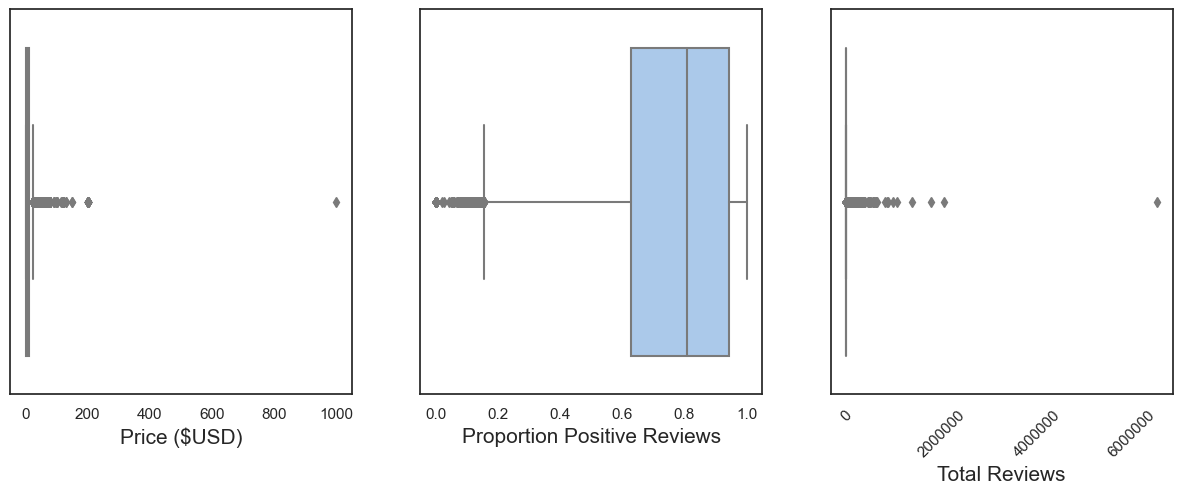

The average game costs: 7.322969019675527
Excluding free games, the average game costs: 8.491659133741388


In [20]:
# Most games have positive reviews, but hard to visualize price and total reviews given the outliers
sns.set_theme(style="white", palette="pastel")
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x="Price",data=a1_df,ax=ax[0])
sns.boxplot(x="Proportion_Positive",data=a1_df,ax=ax[1])
sns.boxplot(x="Total_Reviews",data=a1_df,ax=ax[2])
ax[0].set_xlabel("Price ($USD)",fontsize=15)
ax[1].set_xlabel("Proportion Positive Reviews",fontsize=15)
ax[2].set_xlabel("Total Reviews",fontsize=15)
ax[2].tick_params('x', labelrotation=45)  
plt.ticklabel_format(style='plain', useOffset=False, axis='x')
plt.show()

# Average game
print("The average game costs: {}".format(a1_df["Price"].mean()))

price_df = a1_df[a1_df["Price"] > 0]
# Average game excluding free ones
print("Excluding free games, the average game costs: {}".format(price_df["Price"].mean()))

In [21]:
# most of these games over $100 USD are simulation games
display(a1_df[a1_df["Price"]>=100])
display(a1_df[a1_df["Price"]>=500])

,Name,Release date,Estimated owners,Price,Developers,Publishers,Categories,Genres,Tags,Proportion_Positive,Total_Reviews,About the game
2038,Earthquake escape,2021-11-25,0 - 20000,199.99,CatCat Gaming,CatCat Gaming,Single-player,Simulation,"Simulation,Education,3D,Tutorial,Singleplayer",0.500000,2,"This is an earthquake escape game, about how t..."
6970,Tumble,2021-12-15,0 - 20000,199.99,AT_Games,AT_Games,Single-player,"Action,Adventure,Indie","Exploration,2D Platformer,Action,Dungeon Crawl...",0.900000,10,YOU ARE THE ONLY HOPE Tumble is an action-plat...
9027,W.H.A.L.E.,2020-02-24,0 - 20000,199.99,PixelsDesign VR Dev,PixelsDesign VR Dev,Single-player,"Indie,Simulation",NaN,NaN,0,A water analysis laboratory created for the Un...
10958,ChessBase 15 Steam Edition,2019-10-15,0 - 20000,119.99,ChessBase GmbH,ChessBase GmbH,"Single-player,Multi-player",Strategy,"Strategy,Chess",0.714286,14,"ChessBase is a personal, stand-alone chess dat..."
11108,Lockout Tagout (LOTO) VR Training,2022-03-20,0 - 20000,199.99,GWPro,GWPro,Single-player,Simulation,NaN,NaN,0,Lockout Tagout (LOTO) VR Training Train your p...
11125,Lgnorant girl doll,2019-02-15,0 - 20000,199.99,wandwand,wandwad,Single-player,"Casual,Indie,RPG","Casual,Indie,RPG,Sexual Content,Anime,RPGMaker",0.500000,4,This work is created with RPG Maker MV ● Story...
11441,VBOX Sim,2020-09-03,0 - 20000,129.99,Racelogic,Racelogic,Single-player,Early Access,"Early Access,Racing,Sports,Driving,e-sports,Au...",0.857143,7,VBOX Sim is a new and exciting way to go faste...
14486,VRemedies - Radiotherapy Procedure Experience,2018-05-09,0 - 20000,199.99,StaplesVR,StaplesVR,Single-player,Simulation,NaN,NaN,0,VRemedies is a patient preparation Virtual Rea...
15559,The Island of Dr. Yepstein,2021-09-17,0 - 20000,199.99,"AssetFlipGames,ALFINA GAMERS,rocketship","AssetFlipGames World Game Publishing,ALFINA WO...","Single-player,Steam Achievements","Action,Adventure,Indie","Action,Adventure,Indie,Violent,Story Rich,Atmo...",0.642857,14,The Island of Dr. Yepstein - an uncompromising...
15651,Arcade Drift,2021-06-28,0 - 20000,199.99,EFatullaev,EFatullaev,Single-player,"Casual,Indie,Racing,RPG,Simulation,Sports,Earl...","Racing,Casual,RPG,Sports,Auto Battler,Automobi...",0.875000,8,Choose a car and go to the track! There are 5 ...


,Name,Release date,Estimated owners,Price,Developers,Publishers,Categories,Genres,Tags,Proportion_Positive,Total_Reviews,About the game
26936,Ascent Free-Roaming VR Experience,2019-12-27,0 - 20000,999.0,Fury Games,Fury Games,"Single-player,Multi-player,Co-op,LAN Co-op",Action,"Action,VR,Free to Play,Multiplayer,Arena Shoot...",1.0,6,The Ascent is a Free-Roaming highly immersive ...


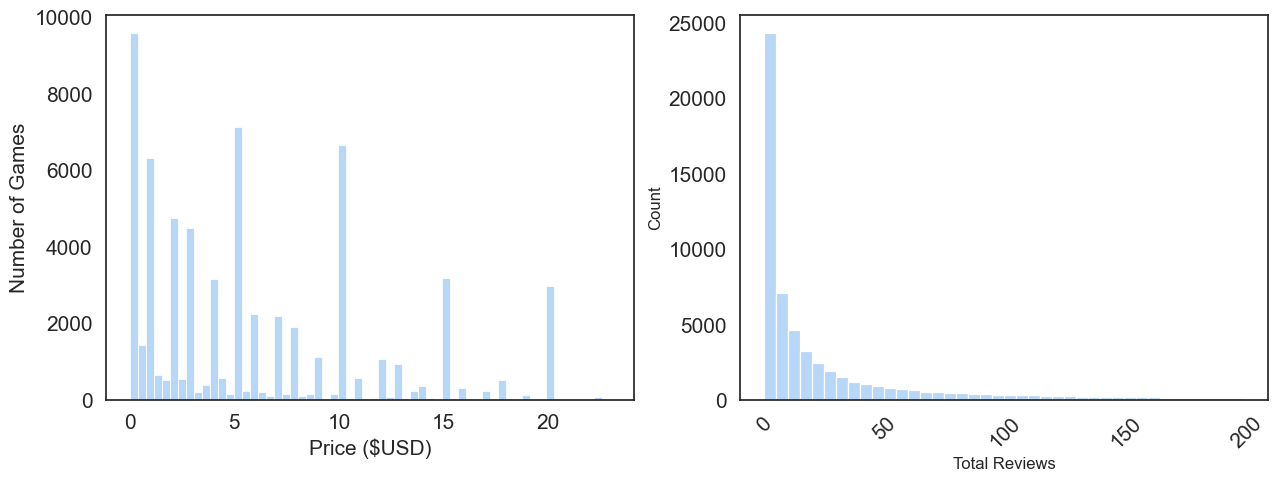

In [22]:
# Visualize the price and total review graphs without outliers, by removing values above 1.5 * IQR
# Most games are fairly cheap (<$20 USD), and most games have 0 reviews

# Price, remove outliers
quartiles = a1_df["Price"].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
price_no_outliers = a1_df[a1_df["Price"] < ((1.5*iqr) + quartiles[0.75])]

# Total Review, remove outliers
quartiles = a1_df["Total_Reviews"].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
totalreviews_no_outliers = a1_df[a1_df["Total_Reviews"] < ((1.5*iqr) + quartiles[0.75])]

sns.set_theme(style="white", palette="pastel")
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(x="Price",data=price_no_outliers,ax=ax[0], bins = 60)
sns.histplot(x="Total_Reviews",data=totalreviews_no_outliers,ax=ax[1], bins = 40)
ax[0].set_xlabel("Price ($USD)",fontsize=15)
ax[0].set_ylabel("Number of Games",fontsize=15)
ax[1].set_xlabel("Total Reviews")
ax[0].tick_params('x', labelsize=15) 
ax[0].tick_params('y', labelsize=15) 
ax[1].tick_params('x', labelrotation=45, labelsize=15) 
ax[1].tick_params('y', labelsize=15) 
plt.ticklabel_format(style='plain', useOffset=False, axis='x') 
plt.show()

### 3.1.2. Games released by year

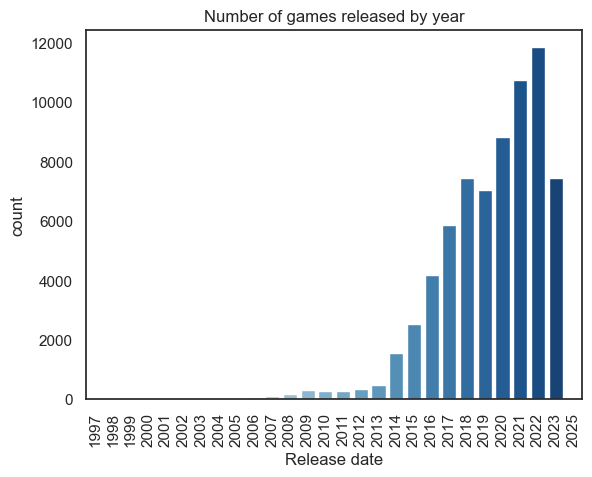

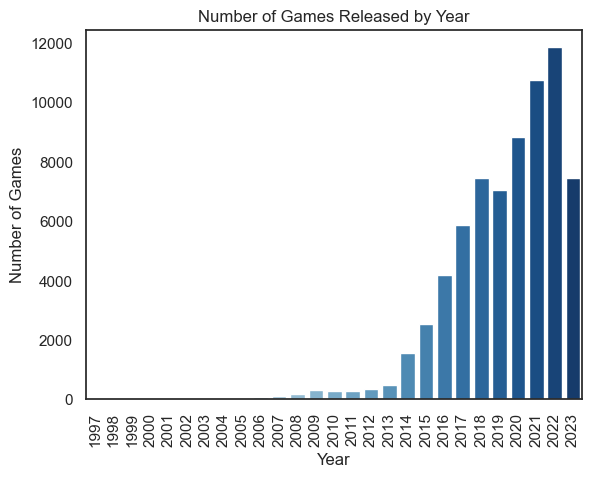

The number of games released in 2022 is 11841


In [23]:
# Visualize the number of games released by year; most games were released in 2022!
releaseyear = a1_df["Release date"].dt.strftime('%Y').astype("int")
sns.countplot(x=releaseyear,palette="Blues")
plt.xticks(rotation=90)
plt.title('Number of games released by year')
plt.show()

# remove the game dated 2025, seems like an error.
a1_df = a1_df[releaseyear != 2025]

releaseyear = a1_df["Release date"].dt.strftime('%Y').astype("int")
sns.countplot(x=releaseyear,palette="Blues")
plt.xticks(rotation=90)
plt.title('Number of Games Released by Year')
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.show()

print("The number of games released in 2022 is {}".format(releaseyear[releaseyear==2022].count()))

### 3.1.3. Estimated Number of Game Owners

0 - 20000                47159
20000 - 50000             7018
0 - 0                     5640
50000 - 100000            3522
100000 - 200000           2371
200000 - 500000           1989
500000 - 1000000           864
1000000 - 2000000          499
2000000 - 5000000          317
5000000 - 10000000          85
10000000 - 20000000         38
20000000 - 50000000         20
50000000 - 100000000         4
100000000 - 200000000        1
Name: Estimated owners, dtype: int64


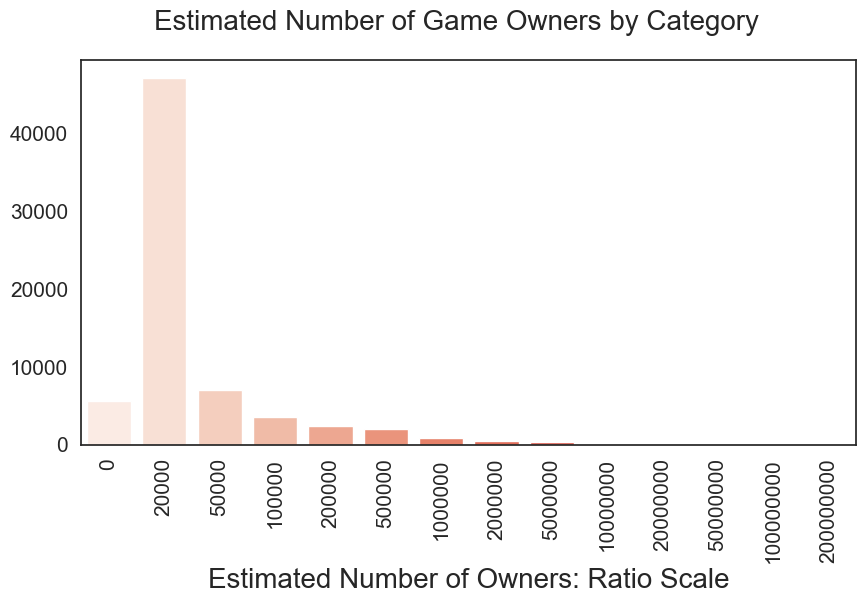

In [24]:
# In order to visualize the "Estimated Owners" column, we need to convert to ordinal scale or ratio scale. Do both here.
# Use maximum value for the ratio scale
# The scores do not seem accurate

print(a1_df["Estimated owners"].value_counts())

remap_ordinal = {
    "0 - 0": 0,
    "0 - 20000": 1,
    "20000 - 50000": 2,
    "50000 - 100000": 3,
    "100000 - 200000": 4,
    "200000 - 500000": 5, 
    "500000 - 1000000": 6,
    "1000000 - 2000000": 7, 
    "2000000 - 5000000": 8,
    "5000000 - 10000000": 9,
    "10000000 - 20000000": 10,
    "20000000 - 50000000": 11,
    "50000000 - 100000000": 12,
    "100000000 - 200000000": 13
}

remap_ratio = {
    "0 - 0": 0,
    "0 - 20000": 20000,
    "20000 - 50000": 50000,
    "50000 - 100000": 100000,
    "100000 - 200000": 200000,
    "200000 - 500000": 500000, 
    "500000 - 1000000": 1000000,
    "1000000 - 2000000": 2000000, 
    "2000000 - 5000000": 5000000,
    "5000000 - 10000000": 10000000,
    "10000000 - 20000000": 20000000,
    "20000000 - 50000000": 50000000,
    "50000000 - 100000000": 100000000,
    "100000000 - 200000000": 200000000
}

pd.options.mode.chained_assignment = None
a1_df["Ordinal_Owners"] = a1_df["Estimated owners"].map(remap_ordinal).astype("int")
a1_df["Ratio_Owners"] = a1_df["Estimated owners"].map(remap_ratio).astype("int")

fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(x="Ratio_Owners",data=a1_df,palette="Reds")
plt.xlabel("Estimated Number of Owners: Ratio Scale",fontsize=20)
plt.ylabel("")
plt.suptitle('Estimated Number of Game Owners by Category',fontsize=20)
plt.tick_params(axis='x', rotation=90, labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show() 


### 3.1.4. Estimated Games Sold

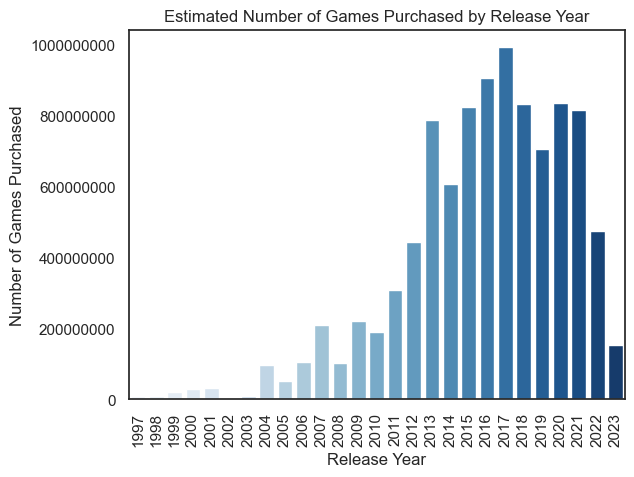

Number of games sold, all time: 9771980000


In [25]:
# This allows us to estimate dollars worth of games sold by year, using our estimated owners 
games_sold = a1_df
games_sold["Year"] = a1_df["Release date"].dt.strftime('%Y').astype("int")
games_sold_year = games_sold.groupby("Year")["Ratio_Owners"].sum()

fig, ax = plt.subplots(1,1)
sns.barplot(x=games_sold_year.index,y=games_sold_year.values,palette="Blues")
plt.xticks(rotation=90)
plt.title('Estimated Number of Games Purchased by Release Year')
plt.xlabel("Release Year")
plt.ylabel("Number of Games Purchased")
plt.ticklabel_format(axis="y", style='plain') 
plt.show()

print("Number of games sold, all time: {}".format(games_sold_year.sum()))

## 3.2. Descriptive Analysis: Categorical Variables

Visualize the Developers, Publishers, Categories, Genres, and Tags variables.
The Categories, Genres, and Tags variables need to be preprocessed first.

### 3.2.1. Developers & Publishers

/Users/aedanli/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29611 (\N{CJK UNIFIED IDEOGRAPH-73AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aedanli/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29808 (\N{CJK UNIFIED IDEOGRAPH-7470}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aedanli/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aedanli/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aedanli/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23460 (\N{CJK UNIFIED IDEOGRAPH-5BA4}) miss

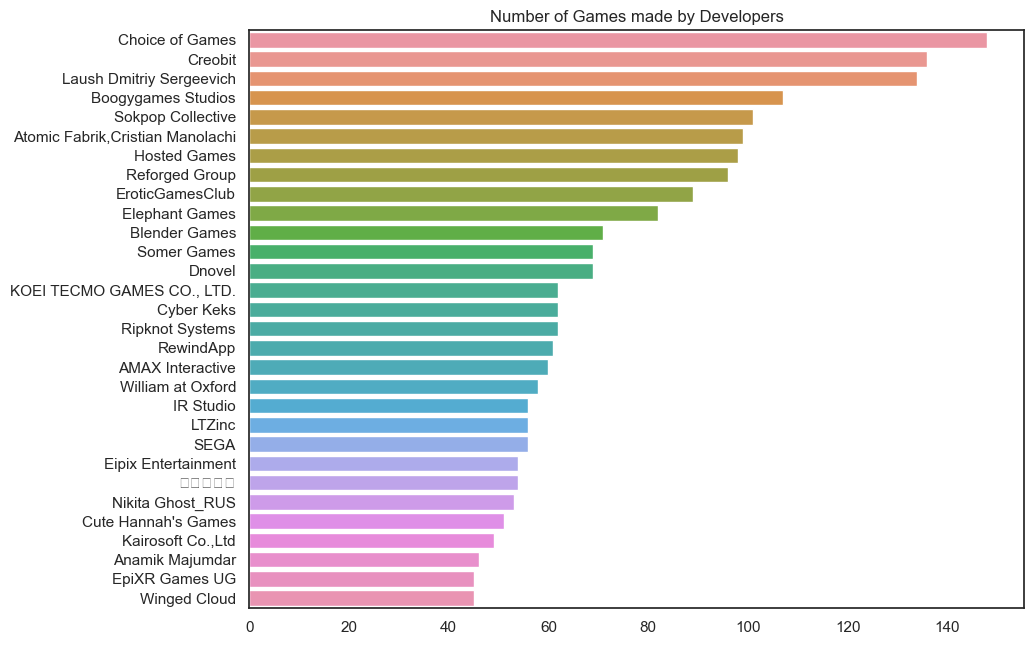

In [26]:
## Note: some developers/publishers are displayed in a CJN which are missing on default plt.

# developers
highest_dev = a1_df["Developers"].value_counts()
highest_dev = highest_dev[:30]

fig, ax = plt.subplots(figsize=(10, 7.5))
sns.barplot(y=highest_dev.index,x=highest_dev.values)
plt.title("Number of Games made by Developers")
plt.show()

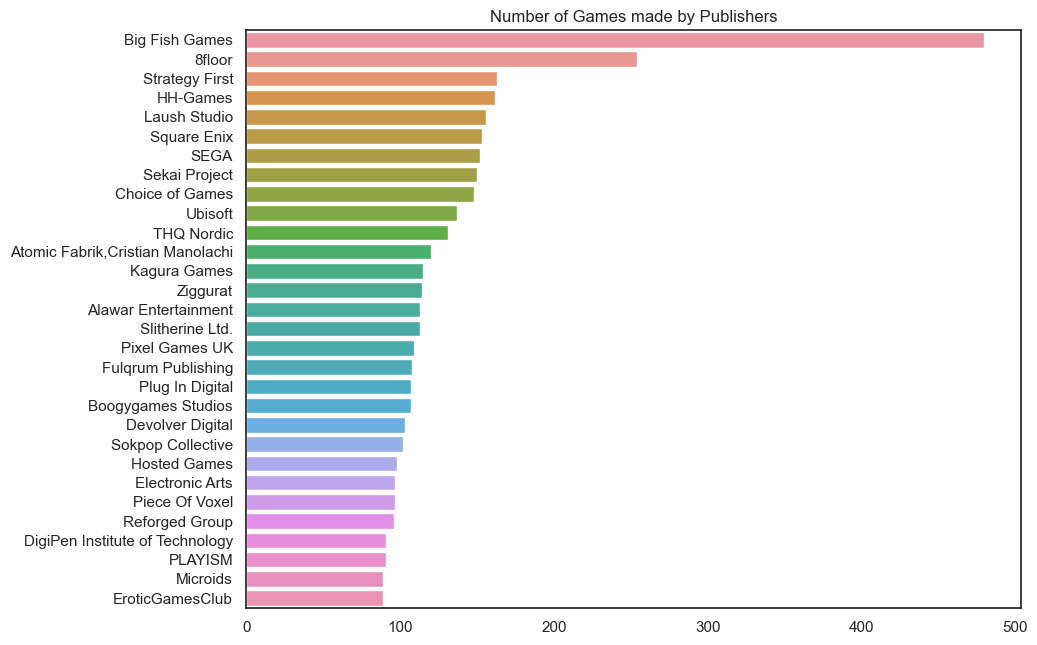

In [27]:
# Publishers
highest_pub = a1_df["Publishers"].value_counts()
highest_pub = highest_pub[:30]

fig, ax = plt.subplots(figsize=(10, 7.5))
sns.barplot(y=highest_pub.index,x=highest_pub.values)
plt.title("Number of Games made by Publishers")
plt.show()

/Users/aedanli/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29611 (\N{CJK UNIFIED IDEOGRAPH-73AB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aedanli/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29808 (\N{CJK UNIFIED IDEOGRAPH-7470}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aedanli/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24037 (\N{CJK UNIFIED IDEOGRAPH-5DE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aedanli/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20316 (\N{CJK UNIFIED IDEOGRAPH-4F5C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aedanli/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23460 (\N{CJK UNIFIED IDEOGRAPH-5BA4}) miss

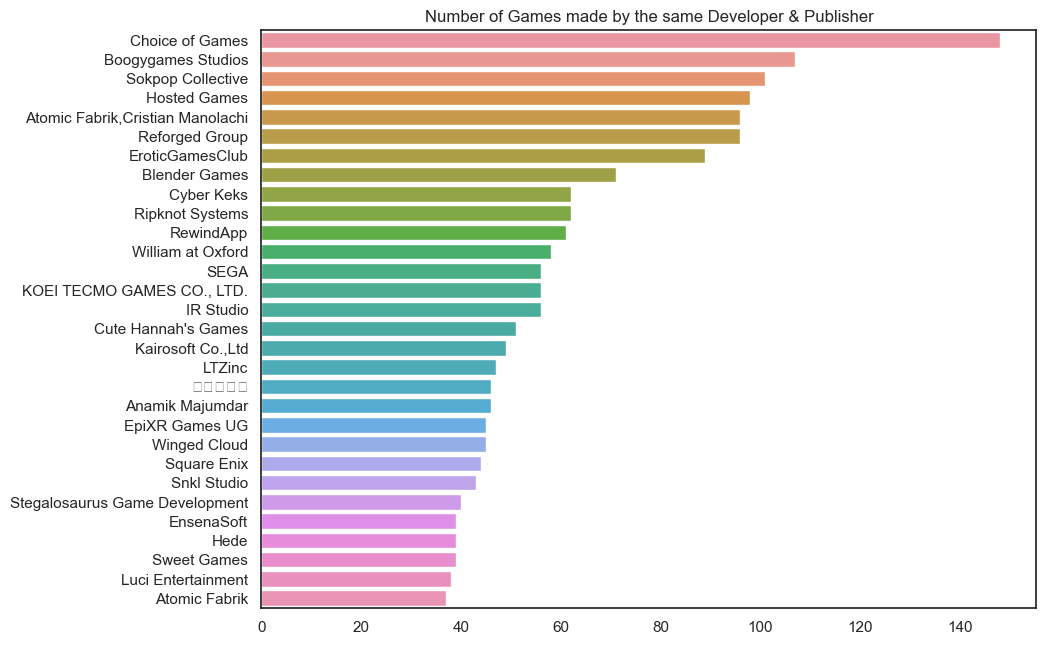

In [28]:
## Note: some developers/publishers are displayed in a CJN which are missing on default plt.

# Also create a column that reflects a game made by the same developer AND publisher
# note the Developer Count and Publisher Count are equivalent here
a1_df["SameDev_Publish"] = a1_df["Developers"] == a1_df["Publishers"] 

same_dev = a1_df[a1_df["SameDev_Publish"] == True]
same_dev = same_dev["Developers"].value_counts().nlargest(n=30)

fig, ax = plt.subplots(figsize=(10, 7.5))
sns.barplot(y=same_dev.index,x=same_dev.values)
plt.title("Number of Games made by the same Developer & Publisher")
plt.show()

### 3.2.2. Categories

Create "multiplayer", "PVP", and "Co-op" variables and visualize them.

In [29]:
# Check the unique categories. 
category_list = a1_df["Categories"].str.split(',').explode().unique().tolist()
print(category_list)

['Single-player', 'Multi-player', 'Steam Achievements', 'Partial Controller Support', 'Full controller support', 'Steam Leaderboards', 'Remote Play on Phone', 'Remote Play on Tablet', 'Remote Play on TV', 'MMO', 'PvP', 'Online PvP', 'Co-op', 'Online Co-op', 'In-App Purchases', 'Steam Cloud', 'Steam Trading Cards', 'Shared/Split Screen', 'Cross-Platform Multiplayer', 'Remote Play Together', 'Stats', 'Shared/Split Screen PvP', 'Captions available', 'Steam Workshop', 'Includes level editor', 'LAN PvP', 'LAN Co-op', 'Shared/Split Screen Co-op', 'Steam Turn Notifications', 'VR Support', 'SteamVR Collectibles', 'Valve Anti-Cheat enabled', 'Includes Source SDK', 'Commentary available', nan, 'Mods (require HL2)', 'Mods', 'Tracked Motion Controller Support', 'Tracked Controller Support', 'VR Only', 'VR Supported']


In [30]:
# Create Multiplayer variable: a game has single-player only, multiplayer-only only, or both
a1_df["sp"] = a1_df["Categories"].str.contains("Single-player")
a1_df["mp"] = a1_df["Categories"].str.contains("Multi-player")

conditions = [
    (a1_df["sp"] == True) & (a1_df["mp"] == False),
    (a1_df["sp"] == False) & (a1_df["mp"] == True),
    (a1_df["sp"] == True) & (a1_df["mp"] == True),
    (a1_df["sp"] == False) & (a1_df["mp"] == False),
    (a1_df["sp"].isna()) | (a1_df["mp"].isna()),    
    ]

values = ["Single player","Multiplayer","Both", "Neither", np.nan]

a1_df["Multiplayer"] = np.select(conditions, values)

# remove columns
a1_df = a1_df.drop(labels=["sp","mp"],axis=1)

a1_df["Multiplayer"].value_counts()

Single player    55628
Both             10770
Multiplayer       3003
Neither             69
nan                 57
Name: Multiplayer, dtype: int64

In [31]:
# Create PVP variable: a game has PVP or not
a1_df["PvP"] = a1_df["Categories"].str.contains("PvP")

# Create Co-op variable: a game has Co-op or not
a1_df["Co-op"] = a1_df["Categories"].str.contains("Co-op")

print(a1_df["PvP"].value_counts())
print(a1_df["Co-op"].value_counts())

False    60723
True      8747
Name: PvP, dtype: int64
False    62605
True      6865
Name: Co-op, dtype: int64


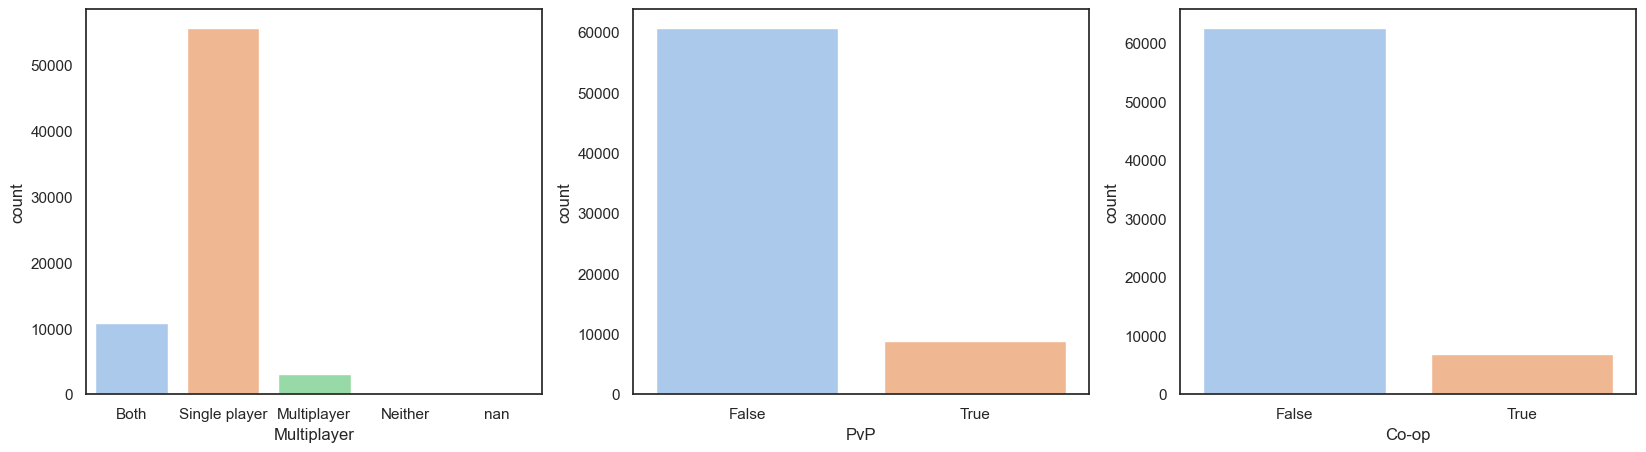

In [32]:
# Visualize the new multiplayer, PVP, and coop variables
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x="Multiplayer",data=a1_df,ax=ax[0])
sns.countplot(x="PvP",data=a1_df,ax=ax[1])
sns.countplot(x="Co-op",data=a1_df,ax=ax[2])
plt.show()

### 3.3.3. Genres

Given that each game has multiple genres, we need to vectorize and count each instance.

In [33]:
# Use CountVectorizer to separate genres into unique columns
from sklearn.feature_extraction.text import CountVectorizer

# Create a tokenizer that splits names by comma 
def comma_tokenizer(s):
        return [i.strip() for i in s.split(',')]
    
genre_vectorization = CountVectorizer(
    stop_words=None,
    tokenizer=comma_tokenizer,
    lowercase=False
) #token_pattern="(?u)([a-zA-Z]+-[a-zA-z]+ [a-zA-z]+)"

genre_token = genre_vectorization.fit_transform(a1_df['Genres'])

# Put the results into a dataframe
genre_df = pd.DataFrame(
    genre_token.toarray(),
    columns=genre_vectorization.get_feature_names_out(),
    index=a1_df.index
)
genre_df


/Users/aedanli/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,Action,Adventure,Casual,Early Access,Free to Play,Gore,Indie,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Violent
0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76980,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0
76981,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
76982,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
76983,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0


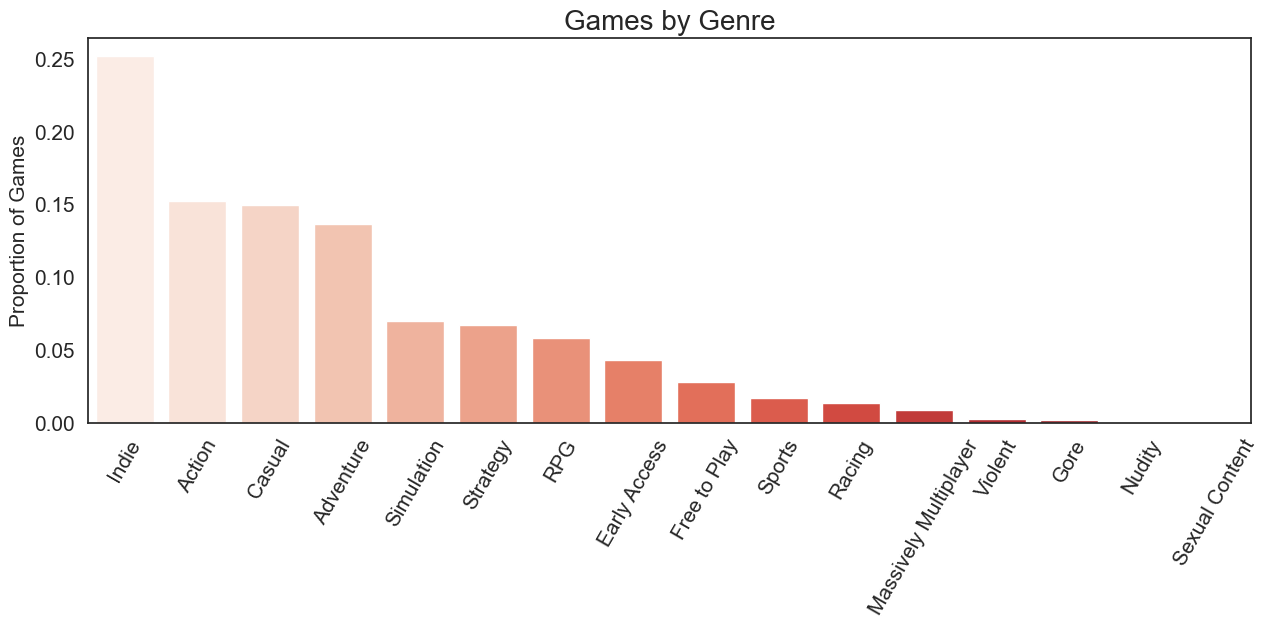

Indie                    0.251845
Action                   0.152123
Casual                   0.149328
Adventure                0.136422
Simulation               0.070055
Strategy                 0.067018
RPG                      0.058032
Early Access             0.042966
Free to Play             0.027936
Sports                   0.016917
Racing                   0.013628
Massively Multiplayer    0.008658
Violent                  0.002518
Gore                     0.001488
Nudity                   0.000555
Sexual Content           0.000510
dtype: float64

In [34]:
# Note that games can fall under multiple genres; 
# Indie games are most common, PG18+ games are least common

genre_counts = genre_df.sum() / genre_df.sum().sum()
genre_counts = genre_counts.sort_values(ascending = False)
fig, ax = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x=genre_counts.index,y=genre_counts.values,palette="Reds")
plt.title("Games by Genre", fontsize = 20)
plt.ylabel("Proportion of Games",fontsize = 15)
plt.xticks(rotation = 60, fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.show()

genre_counts

### 3.3.3. Tags

Given that each tag has multiple genres, we need to vectorize and count each instance.

In [35]:
# Use CountVectorizer to separate genres into unique columns
from sklearn.feature_extraction.text import CountVectorizer

# Create a tokenizer that splits names by comma 
def comma_tokenizer(s):
        return [i.strip() for i in s.split(',')]

# first fill NaN with whitespaces
no_nans = a1_df["Tags"].replace(np.nan,"None")
a1_df["Tags Cleaned"] = no_nans

# count vectorization
tags_vectorization = CountVectorizer(
    stop_words=None,
    tokenizer=comma_tokenizer,
    lowercase=False
) #token_pattern="(?u)([a-zA-Z]+-[a-zA-z]+ [a-zA-z]+)"

tags_token = tags_vectorization.fit_transform(a1_df['Tags Cleaned'])

# Put the results into a dataframe
tags_df = pd.DataFrame(
    tags_token.toarray(),
    columns=tags_vectorization.get_feature_names_out(),
    index=a1_df.index
)
tags_df


/Users/aedanli/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,3D Vision,4 Player Local,4X,6DOF,8-bit Music,ATV,Abstract,Action,Action RPG,Action RTS,Action Roguelike,Action-Adventure,Addictive,Adventure,Agriculture,Aliens,Alternate History,Ambient,America,Animation & Modeling,Anime,Arcade,Archery,Arena Shooter,Artificial Intelligence,Assassin,Asymmetric VR,Asynchronous Multiplayer,Atmospheric,Audio Production,Auto Battler,Automation,Automobile Sim,BMX,Base-Building,Baseball,Based On A Novel,Basketball,Batman,Battle Royale,Beat 'em up,Beautiful,Benchmark,Bikes,Birds,Blood,Board Game,Boss Rush,Bowling,Boxing,Building,Bullet Hell,Bullet Time,CRPG,Capitalism,Card Battler,Card Game,Cartoon,Cartoony,Casual,Cats,Character Action Game,Character Customization,Chess,Choices Matter,Choose Your Own Adventure,Cinematic,City Builder,Class-Based,Classic,Clicker,Co-op,Co-op Campaign,Coding,Cold War,Collectathon,Colony Sim,Colorful,Combat,Combat Racing,Comedy,Comic Book,Competitive,Conspiracy,Controller,Conversation,Cooking,Cozy,Crafting,Creature Collector,Cricket,Crime,Crowdfunded,Cult Classic,Cute,Cyberpunk,Cycling,Dark,Dark Comedy,Dark Fantasy,Dark Humor,Dating Sim,Deckbuilding,Demons,Design & Illustration,Destruction,Detective,Difficult,Dinosaurs,Diplomacy,Documentary,Dog,Dragons,Drama,Driving,Dungeon Crawler,Dungeons & Dragons,Dynamic Narration,Dystopian,Early Access,Economy,Education,Electronic,Electronic Music,Emotional,Epic,Episodic,Escape Room,Experience,Experimental,Exploration,FMV,FPS,Faith,Family Friendly,Fantasy,Farming,Farming Sim,Fast-Paced,Feature Film,Female Protagonist,Fighting,First-Person,Fishing,Flight,Football,Football (American),Football (Soccer),Foreign,Fox,Free to Play,Funny,Futuristic,Gambling,Game Development,GameMaker,Games Workshop,Gaming,God Game,Golf,Gore,Gothic,Grand Strategy,Great Soundtrack,Grid-Based Movement,Gun Customization,Hack and Slash,Hacking,Hand-drawn,Hardware,Heist,Hentai,Hero Shooter,Hex Grid,Hidden Object,Historical,Hobby Sim,Hockey,Horror,Horses,Hunting,Idler,Illuminati,Immersive,Immersive Sim,Indie,Instrumental Music,Intentionally Awkward Controls,Interactive Fiction,Inventory Management,Investigation,Isometric,JRPG,Jet,Job Simulator,Jump Scare,Kickstarter,LEGO,LGBTQ+,Lara Croft,Lemmings,Level Editor,Life Sim,Linear,Local Co-Op,Local Multiplayer,Logic,Loot,Looter Shooter,Lore-Rich,Lovecraftian,MMORPG,MOBA,Magic,Mahjong,Management,Mars,Martial Arts,Massively Multiplayer,Masterpiece,Match 3,Mature,Mechs,Medical Sim,Medieval,Memes,Metroidvania,Military,Mini Golf,Minigames,Minimalist,Mining,Mod,Moddable,Modern,Motocross,Motorbike,Mouse only,Movie,Multiplayer,Multiple Endings,Music,Music-Based Procedural Generation,Musou,Mystery,Mystery Dungeon,Mythology,NSFW,Narration,Narrative,Nature,Naval,Naval Combat,Ninja,Noir,None,Nonlinear,Nostalgia,Nudity,Offroad,Old School,On-Rails Shooter,Online Co-Op,Open World,Open World Survival Craft,Otome,Outbreak Sim,Parkour,Parody,Party,Party Game,Party-Based RPG,Perma Death,Philosophical,Photo Editing,Physics,Pinball,Pirates,Pixel Graphics,Platformer,Point & Click,Political,Political Sim,Politics,Pool,Post-apocalyptic,Precision Platformer,Procedural Generation,Programming,Psychedelic,Psychological,Psychological Horror,Puzzle,Puzzle-Platformer,PvE,PvP,Quick-Time Events,RPG,RPGMaker,RTS,Racing,Real Time Tactics,Real-Time,Real-Time with Pause,Realistic,Reboot,Relaxing,Remake,Replay Value,Resource Management,Retro,Rhythm,Robots,Rock Music,Rogue-like,Rogue-lite,Roguelike Deckbuilder,Roguevania,Romance,Rome,Rugby,Runner,Sailing,Sandbox,Satire,Sci-fi,Science,Score Attack,Sequel,Sexual Content,Shoot 'Em Up,Shooter,Shop Keeper,Short,Side Scroller,Silent Protagonist,Simulation,Singleplayer,Skateboarding,Skating,Skiing,Sniper,Snow,Snowboarding,Soccer,Social Deduction,Software,Software Training,Sokoban,Solitaire,Souls-like,Soundtrack,Space,Space Sim,Spaceships,Spectacle fighter,Spelling,Split Screen,Sports,Stealth,Steam Machine,Steampunk,Story Rich,Strate

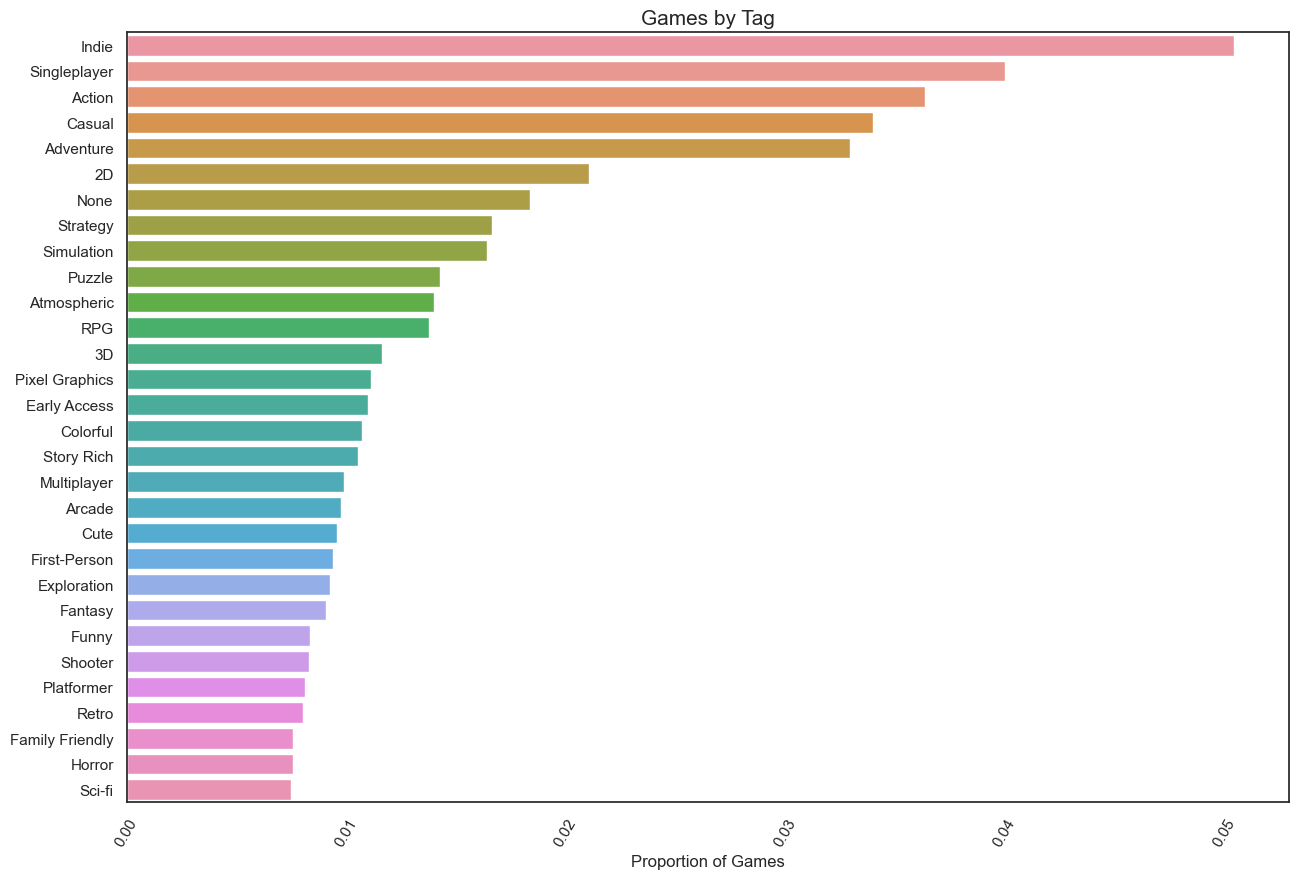

In [36]:
# Note that games can fall under multiple tags; 
# Indie games are most common, PG18+ games are least common

tags_counts = tags_df.sum() / tags_df.sum().sum()
tags_counts = tags_counts.sort_values(ascending = False)
fig, ax = plt.subplots(1,1,figsize=(15,10))
sns.barplot(y=tags_counts[:30].index,x=tags_counts[:30].values)
plt.title("Games by Tag", fontsize = 15)
plt.xlabel("Proportion of Games")
plt.xticks(rotation = 60) 
plt.show()

# 4. Explore Interesting Variable Relationships

There are many possible questions that we could ask here, given the size of this dataset! For brevity, here I explore a limited set of questions:

- What are the best and worst genres?
- What are the best and worst games?
- Which developers/publishers sold the most successful games? 
- What category of game do players prefer?
- When is the best time to release a game in a genre?

## 4.1. What are the best and worst genres?

In [37]:
a1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69527 entries, 0 to 76985
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 69527 non-null  object        
 1   Release date         69527 non-null  datetime64[ns]
 2   Estimated owners     69527 non-null  object        
 3   Price                69527 non-null  float64       
 4   Developers           69437 non-null  object        
 5   Publishers           69202 non-null  object        
 6   Categories           69470 non-null  object        
 7   Genres               69527 non-null  object        
 8   Tags                 56207 non-null  object        
 9   Proportion_Positive  56154 non-null  float64       
 10  Total_Reviews        69527 non-null  int64         
 11  About the game       69449 non-null  object        
 12  Ordinal_Owners       69527 non-null  int64         
 13  Ratio_Owners         69527 non-

In [38]:
genre_sell_df = a1_df[["Name","Ratio_Owners","Proportion_Positive","Total_Reviews"]].join(genre_df)
genre_sell_df

,Name,Ratio_Owners,Proportion_Positive,Total_Reviews,Action,Adventure,Casual,Early Access,Free to Play,Gore,Indie,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Violent
0,Galactic Bowling,20000,0.352941,17,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,Train Bandit,20000,0.913793,58,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Jolt Project,20000,NaN,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,Henosis™,20000,1.000000,3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Two Weeks in Painland,20000,0.862069,58,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76980,To Aerthen,20000,NaN,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0
76981,Kinny and the Star Track Puzzle,20000,NaN,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
76982,Diebrary,20000,0.812500,16,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
76983,Flutter Away,0,NaN,0,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0


,Mean,Std,n,95%CI
Massively Multiplayer,701002.331002,4.575034e+06,1716,216467.020257
Free to Play,422241.285895,4.253478e+06,5537,112037.392122
Action,208457.430931,2.226918e+06,30151,25136.772061
RPG,202546.513650,1.814293e+06,11502,33157.127399
Strategy,145050.816834,1.840447e+06,13283,31299.065508
Adventure,133062.983098,1.403572e+06,27039,16729.978753
Simulation,127494.418437,9.520620e+05,13885,15836.104666
Sports,112666.269013,7.809417e+05,3353,26433.696576
Racing,95164.753795,5.310366e+05,2701,20027.107735
Indie,87960.974437,7.658234e+05,49916,6718.383625


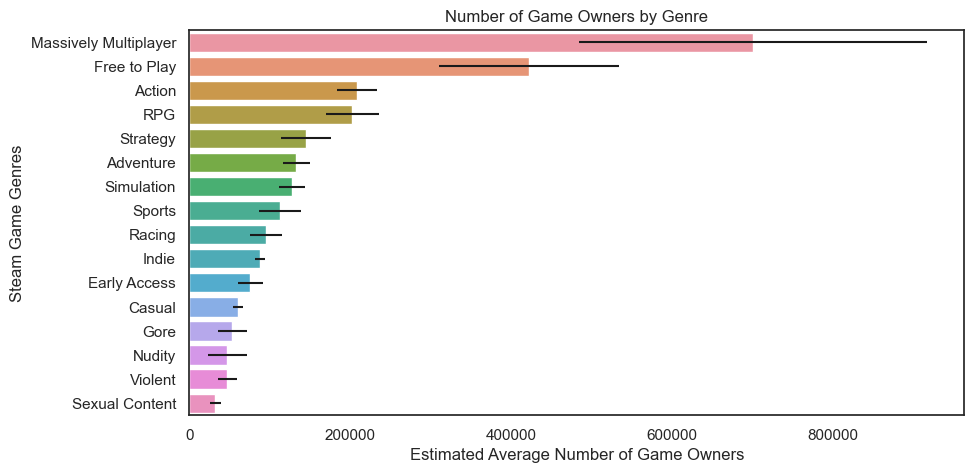

In [39]:
# Loop over the genre columns, and return Ratio_Owners:
# Note: the confidence intervals are massive due to the estimation of this variable
mean_tp = []
std_tp = []
n_tp = []

labels = ["Action","Adventure","Casual","Early Access","Free to Play","Gore","Indie","Massively Multiplayer","Nudity","RPG","Racing","Sexual Content","Simulation","Sports","Strategy","Violent"]

for col in genre_sell_df.columns[4:20]:
    temp_df = genre_sell_df[genre_sell_df[col] == 1]
    mean_tp.append(temp_df["Ratio_Owners"].mean())
    std_tp.append(temp_df["Ratio_Owners"].std())
    n_tp.append(temp_df["Ratio_Owners"].count())

genre_scores=pd.DataFrame(list(zip(mean_tp, std_tp, n_tp)),index=labels)
genre_scores.rename(columns={0:"Mean",1:"Std",2:"n"}, inplace=True)
genre_scores["Mean"].astype("float")
genre_scores["95%CI"] = 1.96*(genre_scores["Std"]/np.sqrt(genre_scores["n"]))

genre_scores = genre_scores.sort_values(by="Mean",ascending=False)
display(genre_scores)

# create sns barplot 
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=genre_scores.index,x=genre_scores["Mean"],
            xerr=genre_scores["95%CI"]*1, capsize=.2, data=genre_scores)
plt.ylabel("Steam Game Genres")
plt.xlabel("Estimated Average Number of Game Owners")
plt.title("Number of Game Owners by Genre")
plt.show()

,Mean,Std,n,95%CI
Massively Multiplayer,5757.108974,58801.161126,1716,2782.167875
Free to Play,3961.027993,97289.945098,5537,2562.635086
Action,2118.749693,45698.307174,30151,515.828488
RPG,1860.919666,20900.256218,11502,381.962740
Adventure,1237.910389,20041.703161,27039,238.888577
Simulation,1223.383940,13358.020793,13885,222.190376
Strategy,1122.139125,17301.921353,13283,294.240411
Sports,955.979123,13509.656647,3353,457.281473
Racing,915.372084,11944.052770,2701,450.448861
Indie,683.626132,10890.716425,49916,95.541627


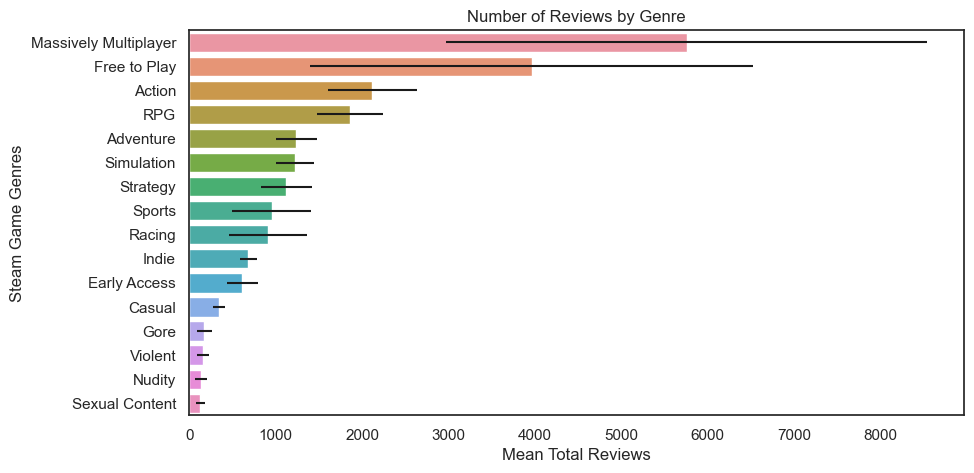

In [40]:
# Loop over the genre columns, and return Total Reviews:
# Note: the confidence intervals are massive, as most games are not purchased at all.
mean_tp = []
std_tp = []
n_tp = []

labels = ["Action","Adventure","Casual","Early Access","Free to Play","Gore","Indie","Massively Multiplayer","Nudity","RPG","Racing","Sexual Content","Simulation","Sports","Strategy","Violent"]

for col in genre_sell_df.columns[4:20]:
    temp_df = genre_sell_df[genre_sell_df[col] == 1]
    mean_tp.append(temp_df["Total_Reviews"].mean())
    std_tp.append(temp_df["Total_Reviews"].std())
    n_tp.append(temp_df["Total_Reviews"].count())

genre_scores=pd.DataFrame(list(zip(mean_tp, std_tp, n_tp)),index=labels)
genre_scores.rename(columns={0:"Mean",1:"Std",2:"n"}, inplace=True)
genre_scores["Mean"].astype("float")
genre_scores["95%CI"] = 1.96*(genre_scores["Std"]/np.sqrt(genre_scores["n"]))

genre_scores = genre_scores.sort_values(by="Mean",ascending=False)
display(genre_scores)

# create sns barplot 
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=genre_scores.index,x=genre_scores["Mean"],
    xerr=genre_scores["95%CI"]*1, capsize=.2, data=genre_scores)
plt.ylabel("Steam Game Genres")
plt.xlabel("Mean Total Reviews")
plt.title("Number of Reviews by Genre")
plt.show()

,Mean,Std,n,95%CI
Casual,0.755018,0.251950,22695,0.003278
Indie,0.753080,0.242818,41027,0.002350
Adventure,0.748176,0.240672,22231,0.003164
Action,0.741635,0.247874,25123,0.003065
RPG,0.740888,0.233636,9330,0.004741
Early Access,0.733226,0.265560,6556,0.006428
Strategy,0.732104,0.241541,11097,0.004494
Free to Play,0.730998,0.170294,3184,0.005915
Sports,0.710511,0.255541,2765,0.009525
Racing,0.708659,0.262516,2238,0.010876


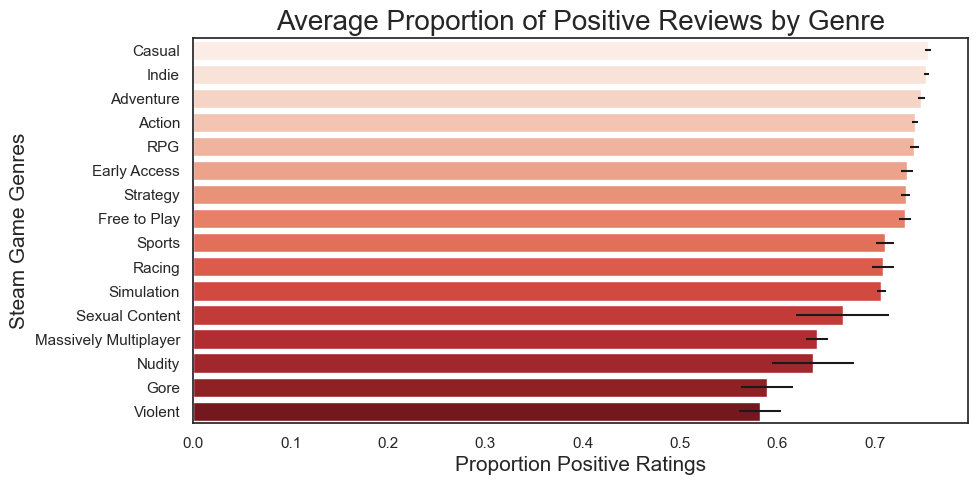

In [41]:
# Lets visualize by Proportion Positive

# Loop over the genre columns, and return Total Reviews:
mean_tp = []
std_tp = []
n_tp = []

labels = ["Action","Adventure","Casual","Early Access","Free to Play","Gore","Indie","Massively Multiplayer","Nudity","RPG","Racing","Sexual Content","Simulation","Sports","Strategy","Violent"]

for col in genre_sell_df.columns[4:20]:
    temp_df = genre_sell_df[genre_sell_df[col] == 1]
    mean_tp.append(temp_df["Proportion_Positive"].mean())
    std_tp.append(temp_df["Proportion_Positive"].std())
    n_tp.append(temp_df["Proportion_Positive"].count())

genre_scores=pd.DataFrame(list(zip(mean_tp, std_tp, n_tp)),index=labels)
genre_scores.rename(columns={0:"Mean",1:"Std",2:"n"}, inplace=True)
genre_scores["Mean"].astype("float")
genre_scores["95%CI"] = 1.96*(genre_scores["Std"]/np.sqrt(genre_scores["n"]))

genre_scores = genre_scores.sort_values(by="Mean",ascending=False)
display(genre_scores)

# create sns barplot 
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=genre_scores.index,x=genre_scores["Mean"],
            xerr=genre_scores["95%CI"]*1, capsize=.2, data=genre_scores,
           palette="Reds")
plt.ylabel("Steam Game Genres",fontsize=15)
plt.xlabel("Proportion Positive Ratings",fontsize=15)
plt.title("Average Proportion of Positive Reviews by Genre",fontsize=20)
plt.show()

### Interim Summary:

- MMO games are the most played (on average)
- The most positively rated games are casual, indie, adventure, action, and RPG games. Surprisingly MMO and PG18+ games are rated the lowest
- Interestingly, MMOs have the most players, but they also tend to be disliked
- Assuming the estimated game owners is accurate, the ideal game seems to be Action, RPG, and Adventure games, which tend to be positively rated 

Overall, MMOs have the potential to be extremely widely played, but these games also tend to be more negatively rated.
The worst games and least played ones are PG18+ games

## 4.2. What are the best and worst games?

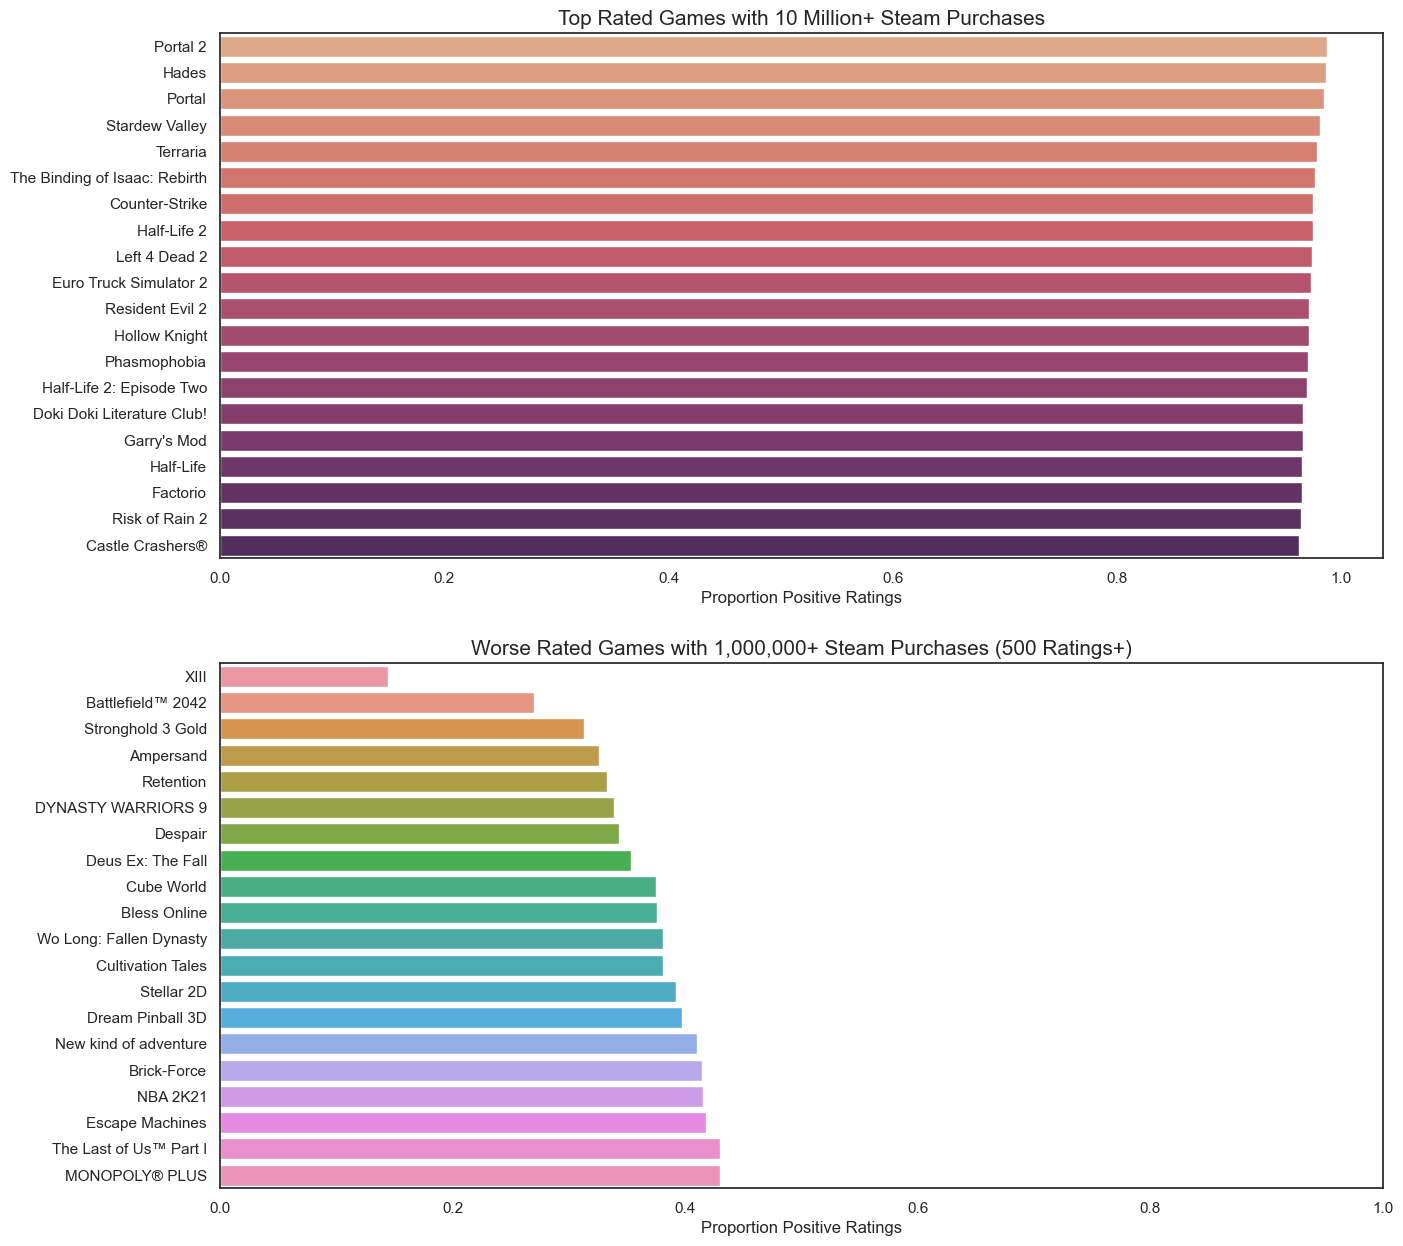

In [42]:
# Filter by highly rated (90% positive+) and at at least 10 million players:
highly_rated = genre_sell_df[(genre_sell_df["Proportion_Positive"] > 0.90) & (genre_sell_df["Ratio_Owners"] >= 10000000)]
highly_rated = highly_rated.sort_values(by="Proportion_Positive", ascending=False)

# Filter by poorly rated (50% positive+), at least 1 million players, and 500 reviews
low_rated = genre_sell_df[(genre_sell_df["Proportion_Positive"] < 0.50) & (genre_sell_df["Ratio_Owners"] >= 1000000) & (genre_sell_df["Total_Reviews"] > 500)]
low_rated = low_rated.sort_values(by="Proportion_Positive", ascending=True)

fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.barplot(y="Name",x="Proportion_Positive",data=highly_rated[:20],ax=ax[0],palette="flare")
sns.barplot(y="Name",x="Proportion_Positive",data=low_rated[:20],ax=ax[1])

ax[0].set_title("Top Rated Games with 10 Million+ Steam Purchases",fontsize=15)
ax[1].set_title("Worse Rated Games with 1,000,000+ Steam Purchases (500 Ratings+)",fontsize=15)

ax[0].set_xlabel("Proportion Positive Ratings")
ax[1].set_xlabel("Proportion Positive Ratings")

ax[0].set_ylabel("")
ax[1].set_ylabel("")

ax[1].set_xlim([0, 1])

plt.ylabel("")
plt.show()

### 4.2.1. Breakdown of Most Popular Genres

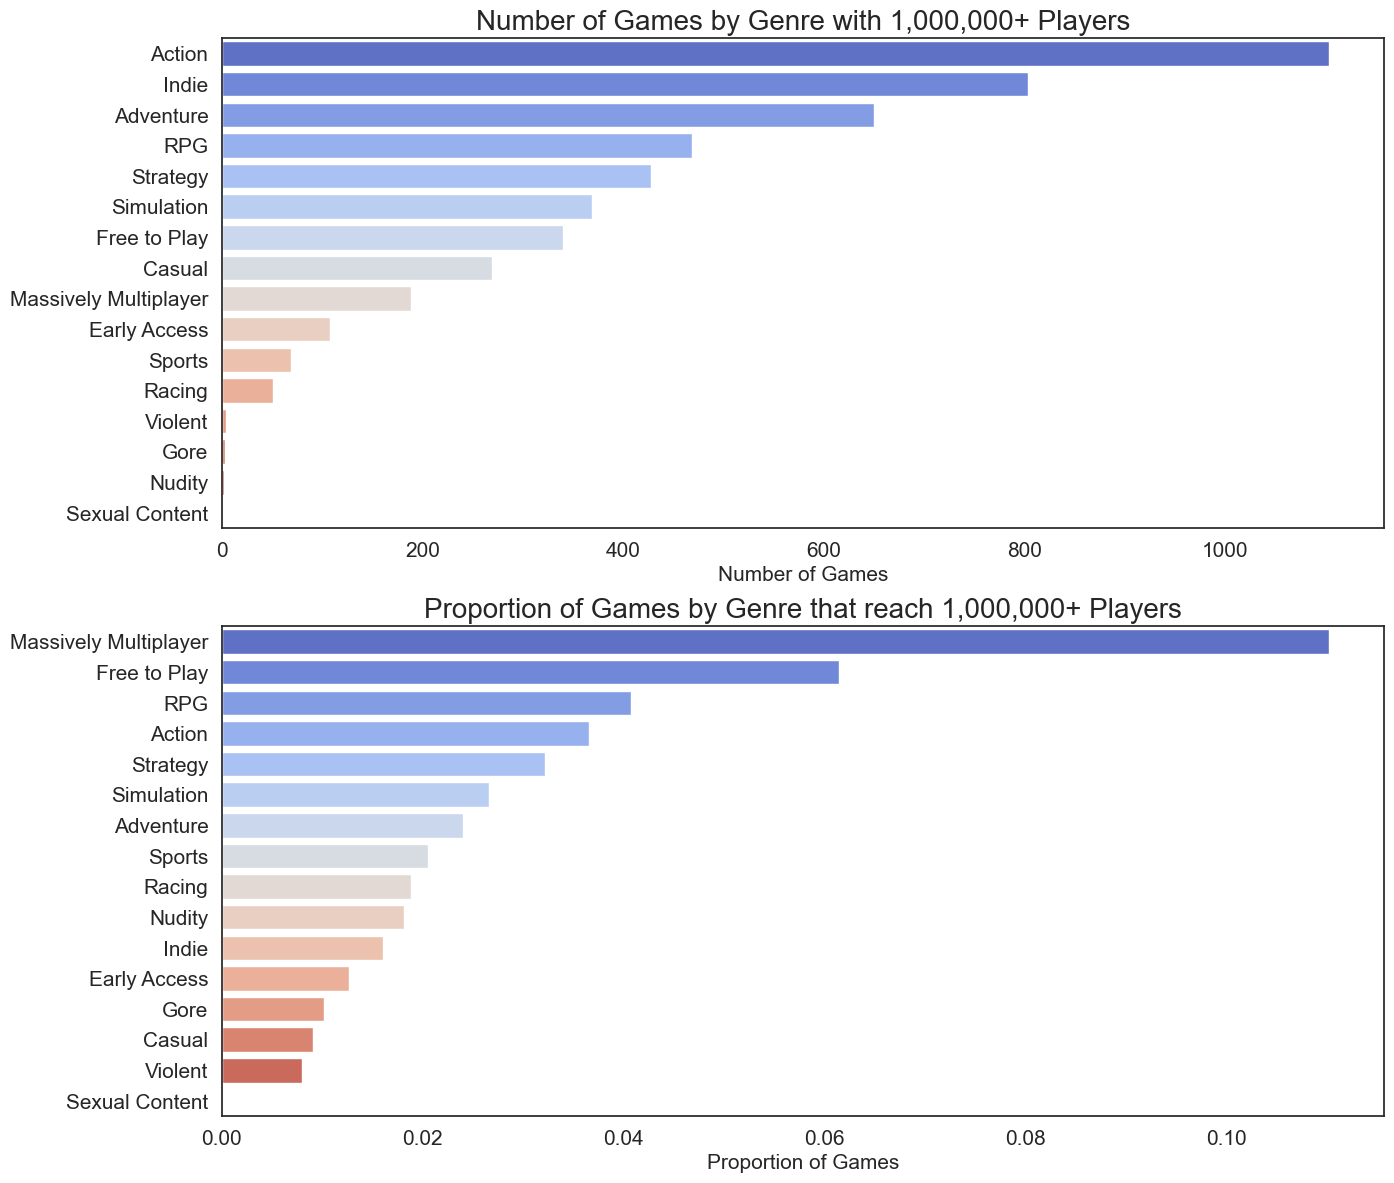

In [43]:
# At least 1 million players
highly_played = genre_sell_df[(genre_sell_df["Ratio_Owners"] >= 1000000)]

highly_played_list = highly_played.sum()
highly_played_list = highly_played_list[4:20]
highly_played_list = highly_played_list.sort_values(ascending=False)

# count total games in each genre
total_genre = genre_sell_df.sum()
total_genre = total_genre[4:20]

# Proportion games in genre that reach > 1 million players
prop_genre = highly_played_list/total_genre
prop_genre = prop_genre.sort_values(ascending=False)

fig, ax = plt.subplots(2,1,figsize=(15,14))
sns.barplot(y=highly_played_list.index,x=highly_played_list.values,ax=ax[0],palette="coolwarm")
sns.barplot(y=prop_genre.index,x=prop_genre.values,ax=ax[1],palette="coolwarm")

ax[0].set_title("Number of Games by Genre with 1,000,000+ Players",fontsize=20)
ax[1].set_title("Proportion of Games by Genre that reach 1,000,000+ Players",fontsize=20)

ax[0].set_xlabel("Number of Games",fontsize=15)
ax[1].set_xlabel("Proportion of Games",fontsize=15)

ax[0].set_ylabel("")
ax[1].set_ylabel("")

ax[0].tick_params('x', labelsize=15) 
ax[0].tick_params('y', labelsize=15) 
ax[1].tick_params('x', labelsize=15) 
ax[1].tick_params('y', labelsize=15) 

### 4.2.2. Games that are "Hidden Gems"

In [44]:
# Filter by highly rated, less than 100,000 purchases, and over 100 reviews
hidden_gems = genre_sell_df[(genre_sell_df["Proportion_Positive"] > 0.9) & (genre_sell_df["Ratio_Owners"] <= 100000) & (genre_sell_df["Total_Reviews"] > 100)]
hidden_gems = hidden_gems.sort_values(by="Proportion_Positive", ascending=False)

# Sample games randomly from the list
display(hidden_gems.sample(n=5, random_state=11))

,Name,Ratio_Owners,Proportion_Positive,Total_Reviews,Action,Adventure,Casual,Early Access,Free to Play,Gore,Indie,Massively Multiplayer,Nudity,RPG,Racing,Sexual Content,Simulation,Sports,Strategy,Violent
1061,Alvora Tactics,20000,0.925926,108,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
20200,Warstride Challenges,100000,0.939850,133,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
20797,6180 the moon,20000,0.910417,480,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
25139,Tetrobot and Co.,100000,0.971554,457,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
24902,KAMUI,50000,0.910256,156,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## 4.3. Which developers/publishers sold the most successful games? 

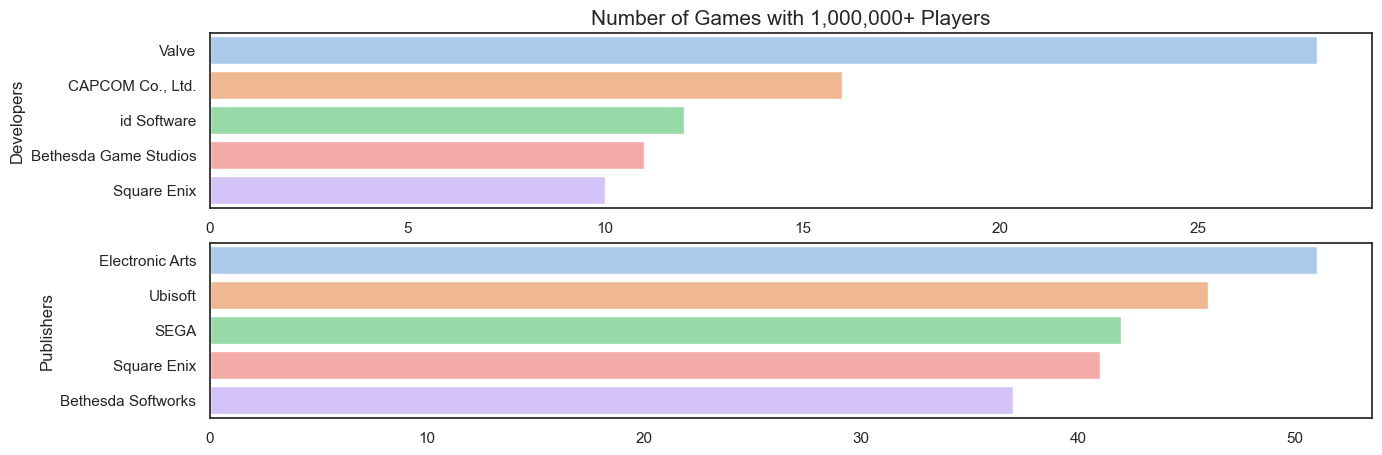

In [45]:
# NOTE: It seems games have more than 1 developer or publisher. This analysis is preliminary as 
# the developer categories were not cleaned.

# At least 1 million players
highly_played = a1_df[(a1_df["Ratio_Owners"] >= 1000000)]

developers = highly_played.groupby("Developers")["Proportion_Positive"].count().sort_values(ascending=False)
developers = developers[developers > 5]

publishers = highly_played.groupby("Publishers")["Proportion_Positive"].count().sort_values(ascending=False)
publishers = publishers[publishers > 5]

fig, ax = plt.subplots(2,1,figsize=(15,5))
sns.barplot(y=developers.index[:5],x=developers.values[:5],ax=ax[0])
sns.barplot(y=publishers.index[:5],x=publishers.values[:5],ax=ax[1])
ax[0].set_title("Number of Games with 1,000,000+ Players",fontsize=15)
plt.show()

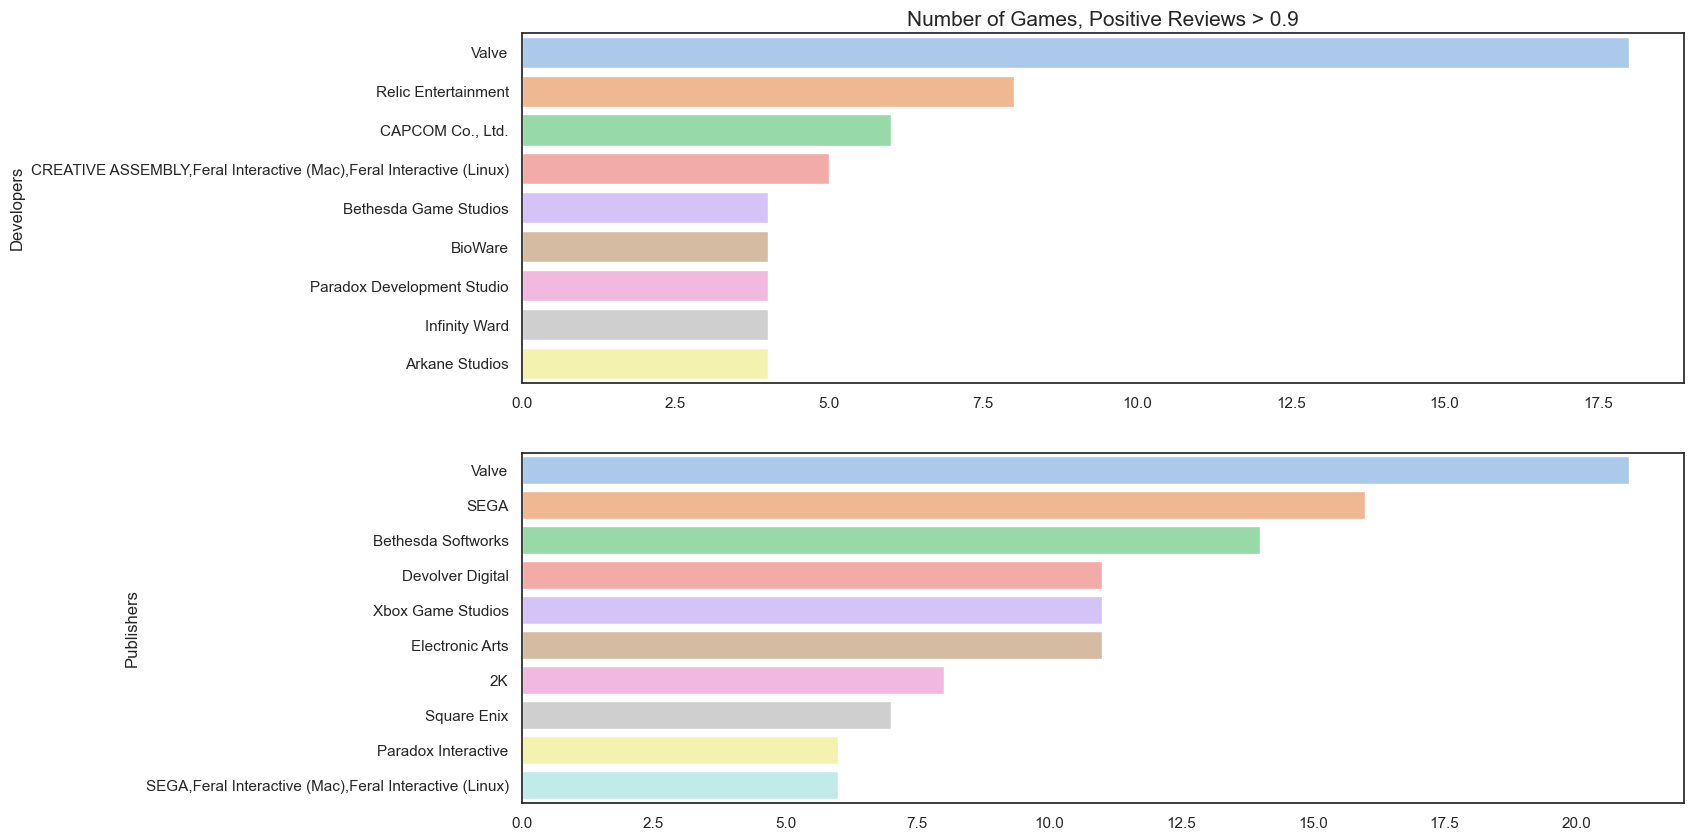

In [46]:
# At least 1 million players & Positive Reviews > 0.9
highly_played = a1_df[(a1_df["Ratio_Owners"] > 1000000) & (a1_df["Proportion_Positive"] > 0.9)]

developers = highly_played.groupby("Developers")["Proportion_Positive"].count().sort_values(ascending=False)
developers = developers[developers > 3]

publishers = highly_played.groupby("Publishers")["Proportion_Positive"].count().sort_values(ascending=False)
publishers = publishers[publishers > 3]

fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.barplot(y=developers.index[:10],x=developers.values[:10],ax=ax[0])
sns.barplot(y=publishers.index[:10],x=publishers.values[:10],ax=ax[1])
ax[0].set_title("Number of Games, Positive Reviews > 0.9",fontsize=15)
plt.show()

Text(0, 0.5, '')

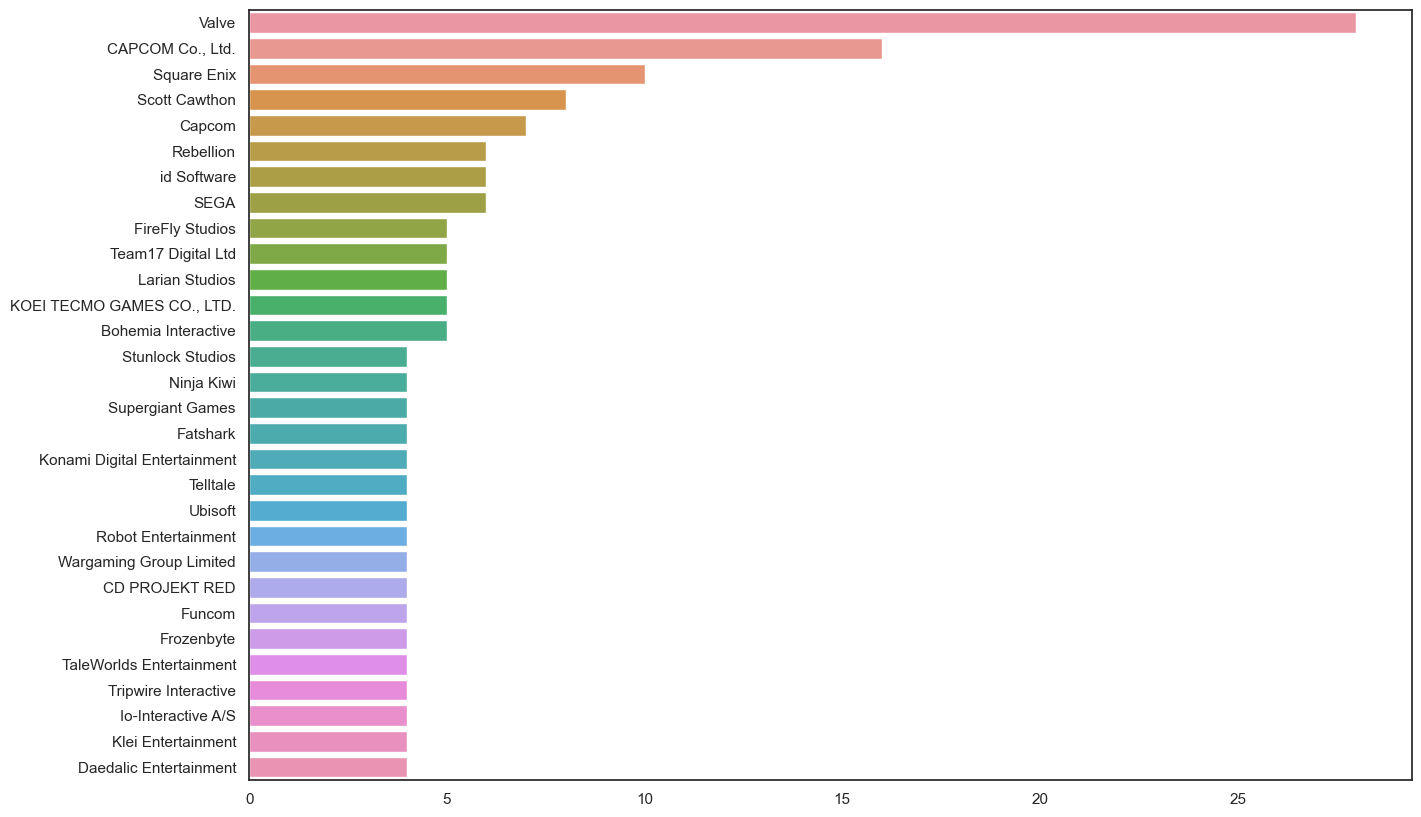

In [47]:
# At least 1 million players & developer + published by the same company
highly_played = a1_df[(a1_df["Ratio_Owners"] >= 1000000) & (a1_df["SameDev_Publish"] == True)]

developers = highly_played.groupby("Developers")["Proportion_Positive"].count().sort_values(ascending=False)
developers = developers[developers > 3]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y=developers.index,x=developers.values)
plt.ylabel("")

## 4.4. Which Developers/Publishers Sold the Most Games on Average?


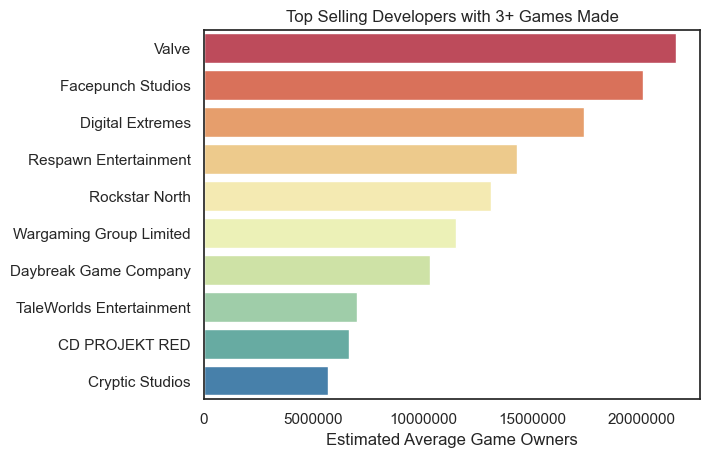

In [72]:
# get the number of games sold by developers and publishers
best_sellers = a1_df.groupby("Developers")["Developers"].transform("count")
a1_df["n_Devs"] = best_sellers

best_sellers = a1_df.groupby("Publishers")["Publishers"].transform("count")
a1_df["n_Pubs"] = best_sellers

# taking the mean of n_Dev returns the same value
bestselling_devs = a1_df.groupby("Developers")[["Ratio_Owners","n_Devs"]].mean()
bestselling_devs = bestselling_devs[bestselling_devs["n_Devs"]>=3]
bestselling_devs_sorted = bestselling_devs.sort_values("Ratio_Owners",ascending=False)

# get top 10
bestselling_devs_sorted = bestselling_devs_sorted[:10] 

sns.barplot(y=bestselling_devs_sorted.index,x="Ratio_Owners",data=bestselling_devs_sorted,palette="Spectral")
plt.title("Top Selling Developers with 3+ Games Made")
plt.ticklabel_format(style="plain",axis="x")
plt.xlabel("Estimated Average Game Owners")
plt.ylabel("")
plt.show()

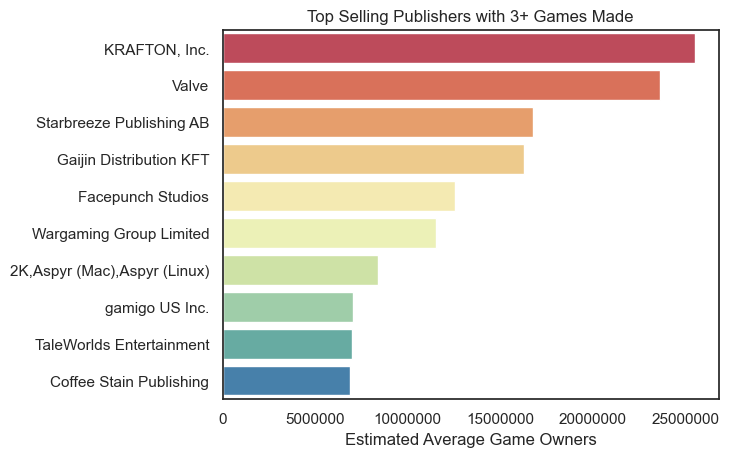

In [73]:
# taking the mean of n_Publisheres returns the same value
bestselling_pubs = a1_df.groupby("Publishers")[["Ratio_Owners","n_Pub"]].mean()
bestselling_pubs = bestselling_pubs[bestselling_pubs["n_Pub"]>=3]
bestselling_pubs_sorted = bestselling_pubs.sort_values("Ratio_Owners",ascending=False)

# get top 5
bestselling_pubs_sorted = bestselling_pubs_sorted[:10] 

sns.barplot(y=bestselling_pubs_sorted.index,x="Ratio_Owners",data=bestselling_pubs_sorted,palette="Spectral")
plt.title("Top Selling Publishers with 3+ Games Made")
plt.ticklabel_format(style="plain",axis="x")
plt.xlabel("Estimated Average Game Owners")
plt.ylabel("")
plt.show()

## 4.5. What category of game do players prefer?

Separate by Multiplayer/Single-Player/Both, PvP, and Co-op Games

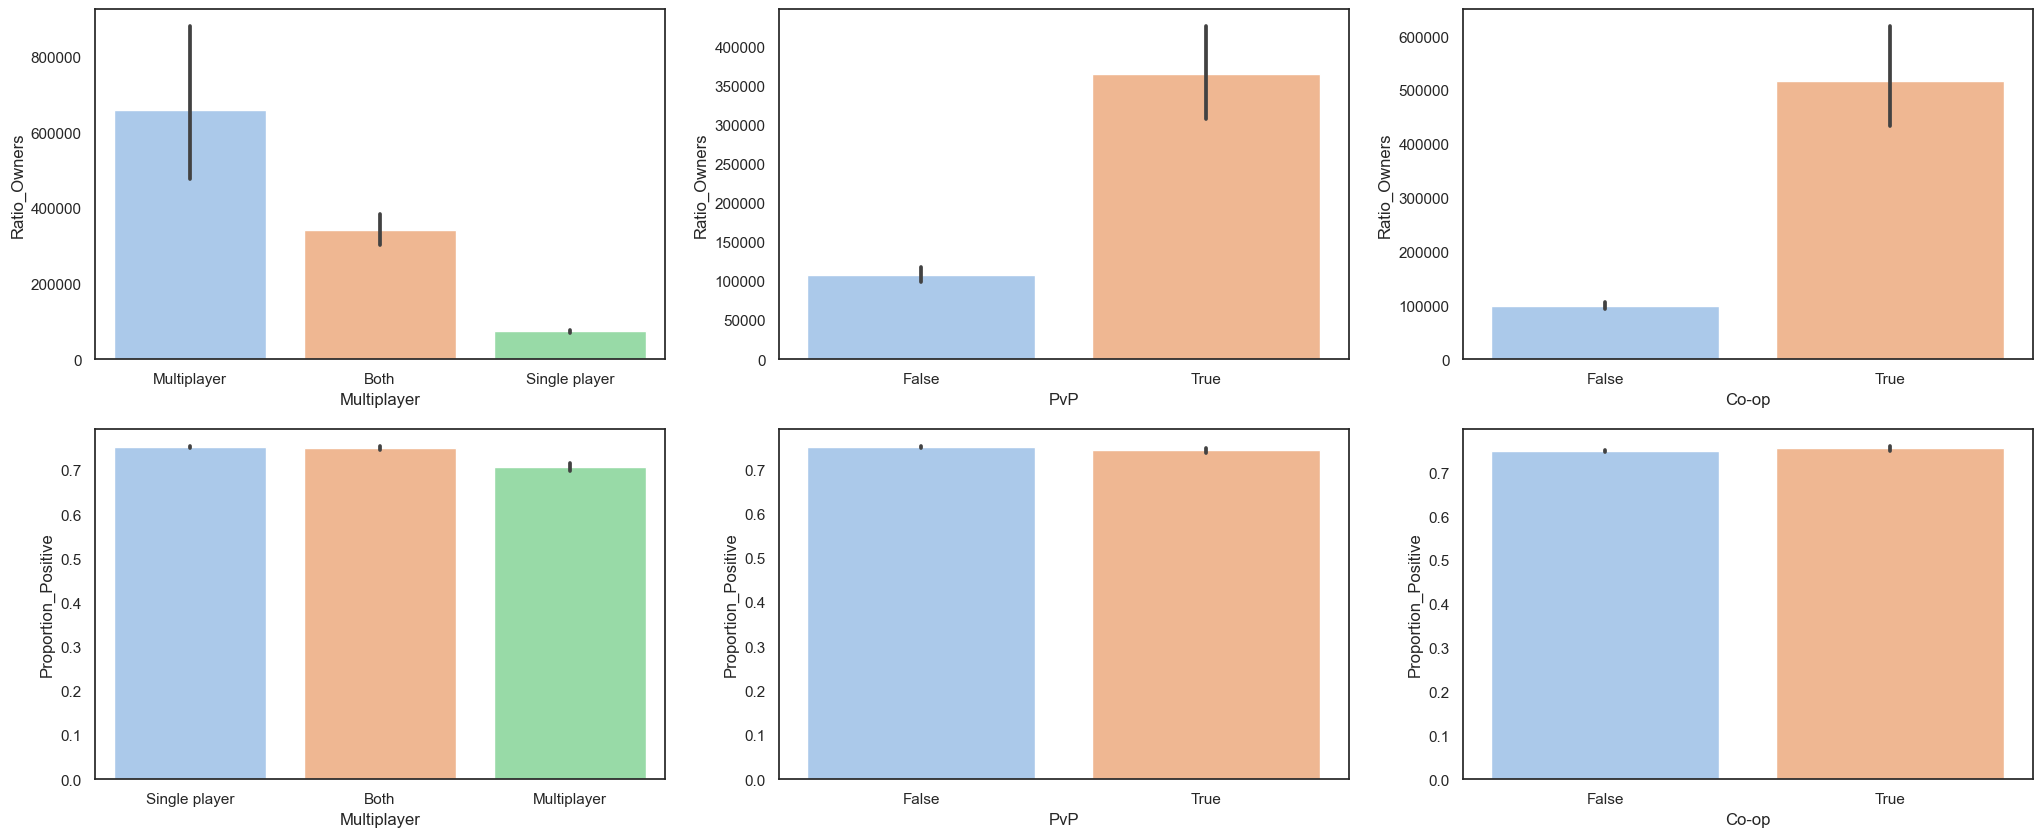

In [75]:
# Multiplayer games capture the most players, but they are less liked overall than single-player games

category_df = a1_df[["Name","Ratio_Owners","Proportion_Positive","Total_Reviews","Multiplayer","PvP","Co-op"]]
category_df = category_df.replace('nan', np.nan)
category_df = category_df.replace('Neither', np.nan)

# remove NaN
category_df = category_df.loc[category_df['Multiplayer'].notnull()]
                      
cat_sorted = category_df.groupby(['Multiplayer'])['Ratio_Owners'].mean().sort_values(ascending=False)
pvp_sorted = category_df.groupby(['PvP'])['Ratio_Owners'].mean().sort_values(ascending=False)

cat_sorted_pos = category_df.groupby(['Multiplayer'])['Proportion_Positive'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(2,3,figsize=(25,10))
sns.barplot(y="Ratio_Owners",x="Multiplayer",data=category_df,order=cat_sorted.index,ax=ax[0,0])
sns.barplot(y="Ratio_Owners",x="PvP",data=category_df,ax=ax[0,1])
sns.barplot(y="Ratio_Owners",x="Co-op",data=category_df,ax=ax[0,2])
sns.barplot(y="Proportion_Positive",x="Multiplayer",data=category_df,order=cat_sorted_pos.index,ax=ax[1,0])
sns.barplot(y="Proportion_Positive",x="PvP",data=category_df,ax=ax[1,1])
sns.barplot(y="Proportion_Positive",x="Co-op",data=category_df,ax=ax[1,2])
plt.show()

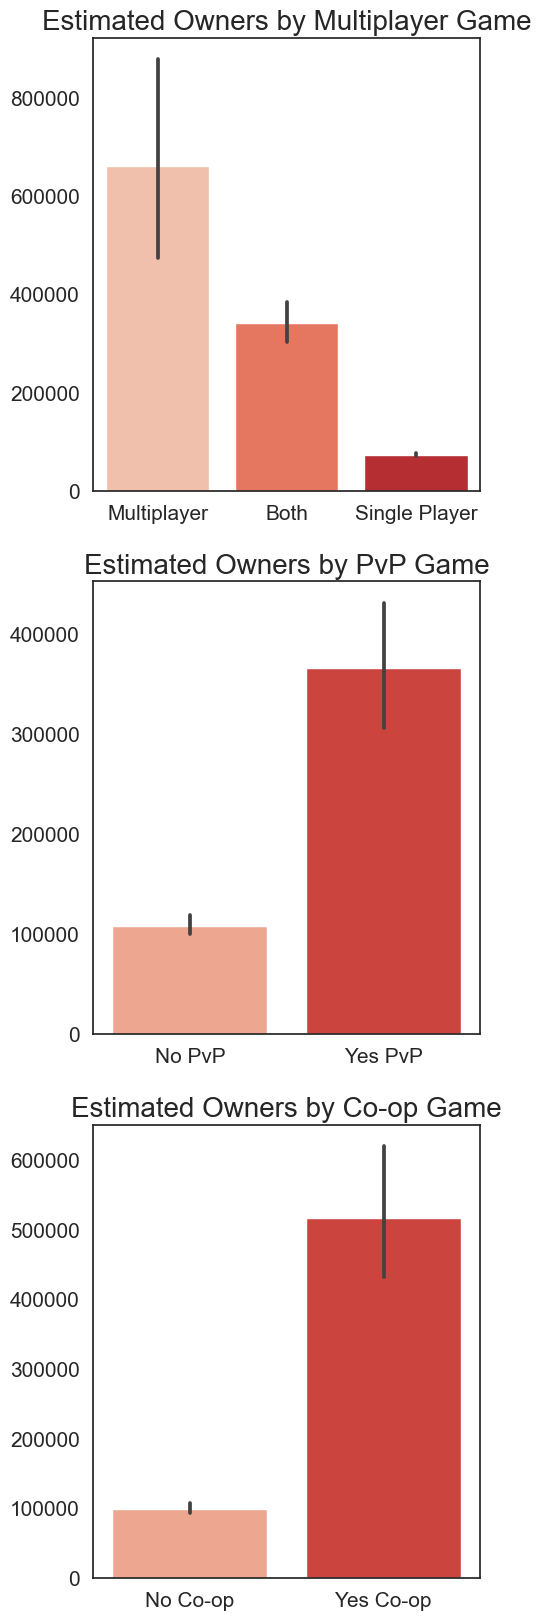

In [77]:
## Make prettier plots
fig, ax = plt.subplots(3,1,figsize=(5,20))
sns.barplot(y="Ratio_Owners",x="Multiplayer",data=category_df,order=cat_sorted.index,ax=ax[0],palette="Reds")
sns.barplot(y="Ratio_Owners",x="PvP",data=category_df,ax=ax[1],palette="Reds")
sns.barplot(y="Ratio_Owners",x="Co-op",data=category_df,ax=ax[2],palette="Reds")

ax[0].set_xticklabels(["Multiplayer","Both","Single Player"],fontsize=15) 
ax[1].set_xticklabels(["No PvP","Yes PvP"],fontsize=15) 
ax[2].set_xticklabels(["No Co-op","Yes Co-op"],fontsize=15) 
ax[0].tick_params("y",labelsize = 15)
ax[1].tick_params("y",labelsize = 15)
ax[2].tick_params("y",labelsize = 15)

ax[0].set_xlabel("") 
ax[1].set_xlabel("") 
ax[2].set_xlabel("") 
ax[0].set_ylabel("") 
ax[1].set_ylabel("") 
ax[2].set_ylabel("") 

ax[0].set_title("Estimated Owners by Multiplayer Game",fontsize=20) 
ax[1].set_title("Estimated Owners by PvP Game",fontsize=20) 
ax[2].set_title("Estimated Owners by Co-op Game",fontsize=20) 

plt.show()

In [78]:
# calculate p values for differences in PvP
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

cat1 = category_df[category_df["PvP"]==False]
cat2 = category_df[category_df["PvP"]==True]
print("PvP: {}".format(ttest_ind(cat1["Ratio_Owners"], cat2["Ratio_Owners"])))

# calculate p values for differences in Co-Op
cat1 = category_df[category_df["Co-op"]==False]
cat2 = category_df[category_df["Co-op"]==True]
print("Co-op: {}".format(ttest_ind(cat1["Ratio_Owners"], cat2["Ratio_Owners"])))

# calculate ANOVA, given three categories
cat1 = category_df[category_df["Multiplayer"]=="Multiplayer"]
cat2 = category_df[category_df["Multiplayer"]=="Both"]
cat3 = category_df[category_df["Multiplayer"]=="Single player"]
print("Co-op: {}".format(f_oneway(cat1["Ratio_Owners"], cat2["Ratio_Owners"],cat3["Ratio_Owners"])))

PvP: Ttest_indResult(statistic=-14.670918734524395, pvalue=1.1711538279842309e-48)
Co-op: Ttest_indResult(statistic=-21.40669072922535, pvalue=2.466146611951641e-101)
Co-op: F_onewayResult(statistic=319.6604441242023, pvalue=6.438656577510653e-139)


## 4.6. When is the best time to release a game by genre?

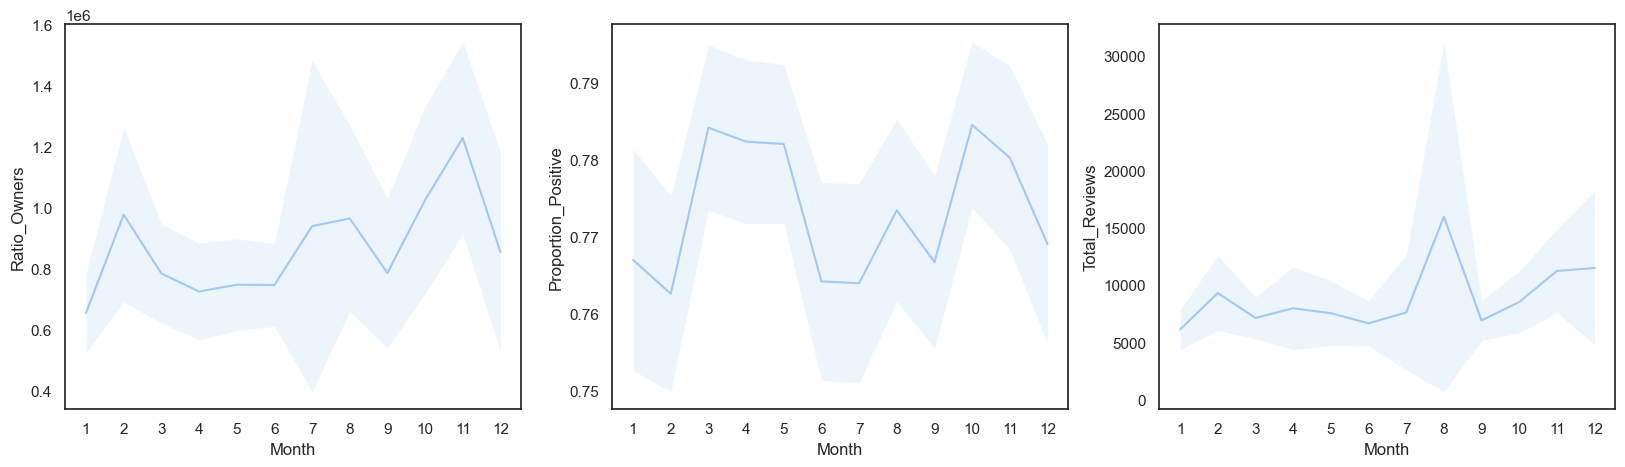

Name                     9710
Ratio_Owners             9710
Proportion_Positive      9702
Total_Reviews            9710
Action                   9710
Adventure                9710
Casual                   9710
Early Access             9710
Free to Play             9710
Gore                     9710
Indie                    9710
Massively Multiplayer    9710
Nudity                   9710
RPG                      9710
Racing                   9710
Sexual Content           9710
Simulation               9710
Sports                   9710
Strategy                 9710
Violent                  9710
Release date             9710
Month                    9710
dtype: int64

In [79]:
# First show overall
genretime_df = genre_sell_df
genretime_df["Release date"] = a1_df["Release date"]
genretime_df["Month"] = a1_df["Release date"].dt.month

# Filter by >=100000 owners
genretime_df = genretime_df[genretime_df["Ratio_Owners"] >= 100000]

grouped_genretime_mean = genretime_df.groupby("Month")[["Ratio_Owners","Proportion_Positive","Total_Reviews"]].mean()
grouped_genretime_std = genretime_df.groupby("Month")[["Ratio_Owners","Proportion_Positive","Total_Reviews"]].std()
grouped_genretime_count = genretime_df.groupby("Month")[["Ratio_Owners","Proportion_Positive","Total_Reviews"]].count()
grouped_genretime_95CI = 1.96*(grouped_genretime_std/np.sqrt(grouped_genretime_count))

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.lineplot(x=grouped_genretime_mean.index,y="Ratio_Owners",data=grouped_genretime_mean,ax=ax[0])
sns.lineplot(x=grouped_genretime_mean.index,y="Proportion_Positive",data=grouped_genretime_mean,ax=ax[1])
sns.lineplot(x=grouped_genretime_mean.index,y="Total_Reviews",data=grouped_genretime_mean,ax=ax[2])

ax[0].fill_between(grouped_genretime_mean.index, grouped_genretime_mean["Ratio_Owners"] - grouped_genretime_95CI["Ratio_Owners"], grouped_genretime_mean["Ratio_Owners"] + grouped_genretime_95CI["Ratio_Owners"], alpha=0.2)
ax[1].fill_between(grouped_genretime_mean.index, grouped_genretime_mean["Proportion_Positive"] - grouped_genretime_95CI["Proportion_Positive"], grouped_genretime_mean["Proportion_Positive"] + grouped_genretime_95CI["Proportion_Positive"], alpha=0.2)
ax[2].fill_between(grouped_genretime_mean.index, grouped_genretime_mean["Total_Reviews"] - grouped_genretime_95CI["Total_Reviews"], grouped_genretime_mean["Total_Reviews"] + grouped_genretime_95CI["Total_Reviews"], alpha=0.2)

ax[0].set(xticks=grouped_genretime_mean.index)
ax[1].set(xticks=grouped_genretime_mean.index)
ax[2].set(xticks=grouped_genretime_mean.index)

plt.show()

genretime_df.count()

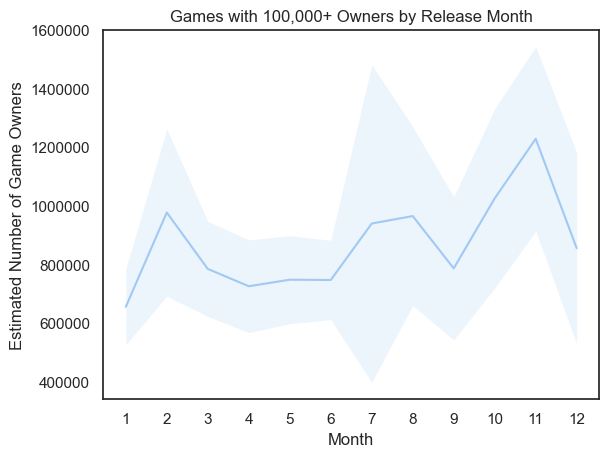

In [80]:
# Make a better line plot for Ratio Owners x Date 

sns.lineplot(x=grouped_genretime_mean.index,y="Ratio_Owners",data=grouped_genretime_mean)
plt.fill_between(grouped_genretime_mean.index, grouped_genretime_mean["Ratio_Owners"] - grouped_genretime_95CI["Ratio_Owners"], grouped_genretime_mean["Ratio_Owners"] + grouped_genretime_95CI["Ratio_Owners"], alpha=0.2)
plt.ticklabel_format(style="plain")
plt.title("Release Month")
plt.ylabel("Estimated Number of Game Owners")
plt.title("Games with 100,000+ Owners by Release Month")
plt.xticks(grouped_genretime_mean.index)

plt.show()

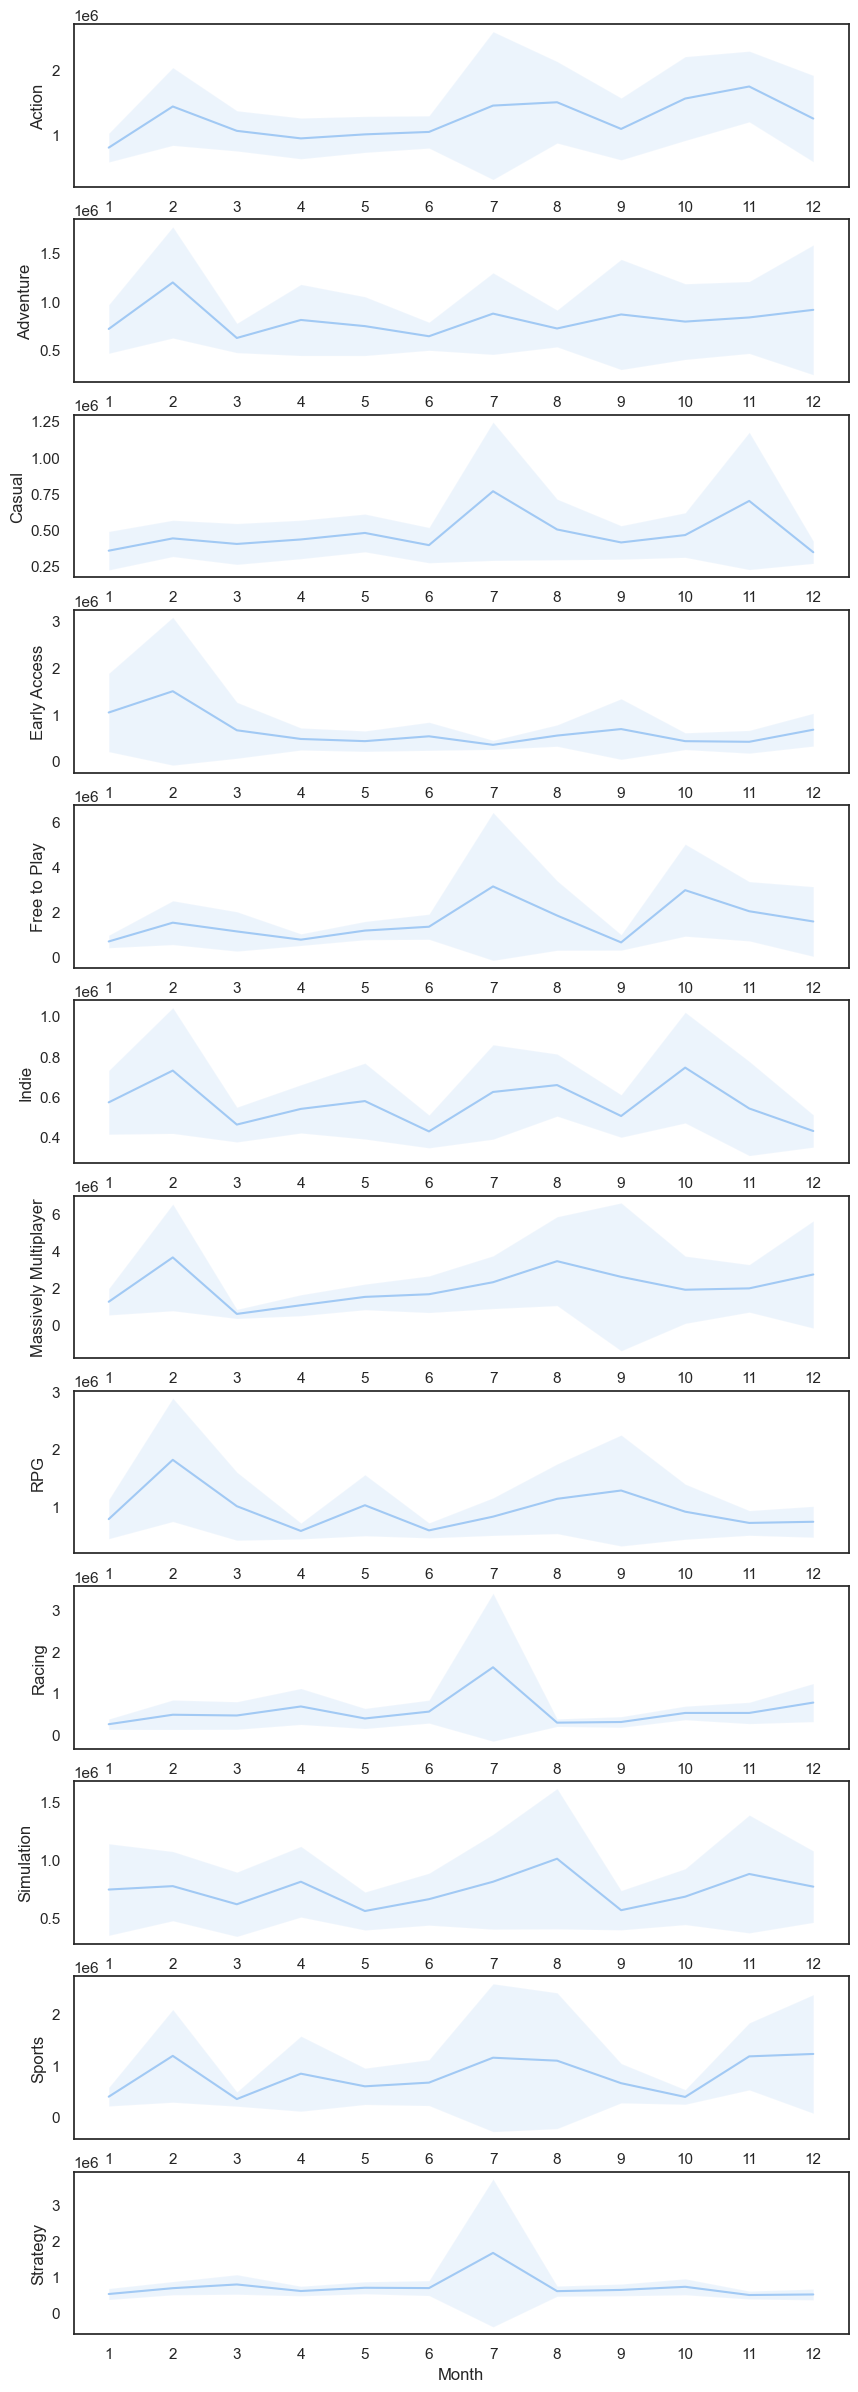

In [81]:
# Identify highly purchased games, over 100,000
genretime_df = genretime_df[genretime_df["Ratio_Owners"] >= 100000]

# Loop over the genre columns, and return Proportion Positive, grouping by month:
mean_tp = pd.DataFrame()
std_tp = pd.DataFrame()
n_tp = pd.DataFrame()
CI95 = pd.DataFrame()

labels = ["Action","Adventure","Casual","Early Access","Free to Play","Gore","Indie","Massively Multiplayer","Nudity",
          "RPG","Racing","Sexual Content","Simulation","Sports","Strategy","Violent"]

for col in genretime_df.columns[4:20]:
    temp_df = genretime_df[genretime_df[col] == 1]
    mean_tp[col] = (temp_df.groupby("Month")["Ratio_Owners"].mean())
    std_tp[col] = (temp_df.groupby("Month")["Ratio_Owners"].std())
    n_tp[col] = (temp_df.groupby("Month")["Ratio_Owners"].count())

CI95 = 1.96*(std_tp/np.sqrt(n_tp))
    
fig, ax = plt.subplots(12,1,figsize=(10,30))
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Action",ax=ax[0])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Adventure",ax=ax[1])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Casual",ax=ax[2])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Early Access",ax=ax[3])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Free to Play",ax=ax[4])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Indie",ax=ax[5])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Massively Multiplayer",ax=ax[6])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="RPG",ax=ax[7])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Racing",ax=ax[8])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Simulation",ax=ax[9])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Sports",ax=ax[10])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Strategy",ax=ax[11])

ax[0].fill_between(mean_tp.index, mean_tp["Action"] - CI95["Action"], mean_tp["Action"] + CI95["Action"], alpha=0.2)
ax[1].fill_between(mean_tp.index, mean_tp["Adventure"] - CI95["Adventure"], mean_tp["Adventure"] + CI95["Adventure"], alpha=0.2)
ax[2].fill_between(mean_tp.index, mean_tp["Casual"] - CI95["Casual"], mean_tp["Casual"] + CI95["Casual"], alpha=0.2)
ax[3].fill_between(mean_tp.index, mean_tp["Early Access"] - CI95["Early Access"], mean_tp["Early Access"] + CI95["Early Access"], alpha=0.2)
ax[4].fill_between(mean_tp.index, mean_tp["Free to Play"] - CI95["Free to Play"], mean_tp["Free to Play"] + CI95["Free to Play"], alpha=0.2)
ax[5].fill_between(mean_tp.index, mean_tp["Indie"] - CI95["Indie"], mean_tp["Indie"] + CI95["Indie"], alpha=0.2)
ax[6].fill_between(mean_tp.index, mean_tp["Massively Multiplayer"] - CI95["Massively Multiplayer"], mean_tp["Massively Multiplayer"] + CI95["Massively Multiplayer"], alpha=0.2)
ax[7].fill_between(mean_tp.index, mean_tp["RPG"] - CI95["RPG"], mean_tp["RPG"] + CI95["RPG"], alpha=0.2)
ax[8].fill_between(mean_tp.index, mean_tp["Racing"] - CI95["Racing"], mean_tp["Racing"] + CI95["Racing"], alpha=0.2)
ax[9].fill_between(mean_tp.index, mean_tp["Simulation"] - CI95["Simulation"], mean_tp["Simulation"] + CI95["Simulation"], alpha=0.2)
ax[10].fill_between(mean_tp.index, mean_tp["Sports"] - CI95["Sports"], mean_tp["Sports"] + CI95["Sports"], alpha=0.2)
ax[11].fill_between(mean_tp.index, mean_tp["Strategy"] - CI95["Strategy"], mean_tp["Strategy"] + CI95["Strategy"], alpha=0.2)

ax[0].set(xticks=mean_tp.index)
ax[1].set(xticks=mean_tp.index)
ax[2].set(xticks=mean_tp.index)
ax[3].set(xticks=mean_tp.index)
ax[4].set(xticks=mean_tp.index)
ax[5].set(xticks=mean_tp.index)
ax[6].set(xticks=mean_tp.index)
ax[7].set(xticks=mean_tp.index)
ax[8].set(xticks=mean_tp.index)
ax[9].set(xticks=mean_tp.index)
ax[10].set(xticks=mean_tp.index)
ax[11].set(xticks=mean_tp.index)

plt.show()

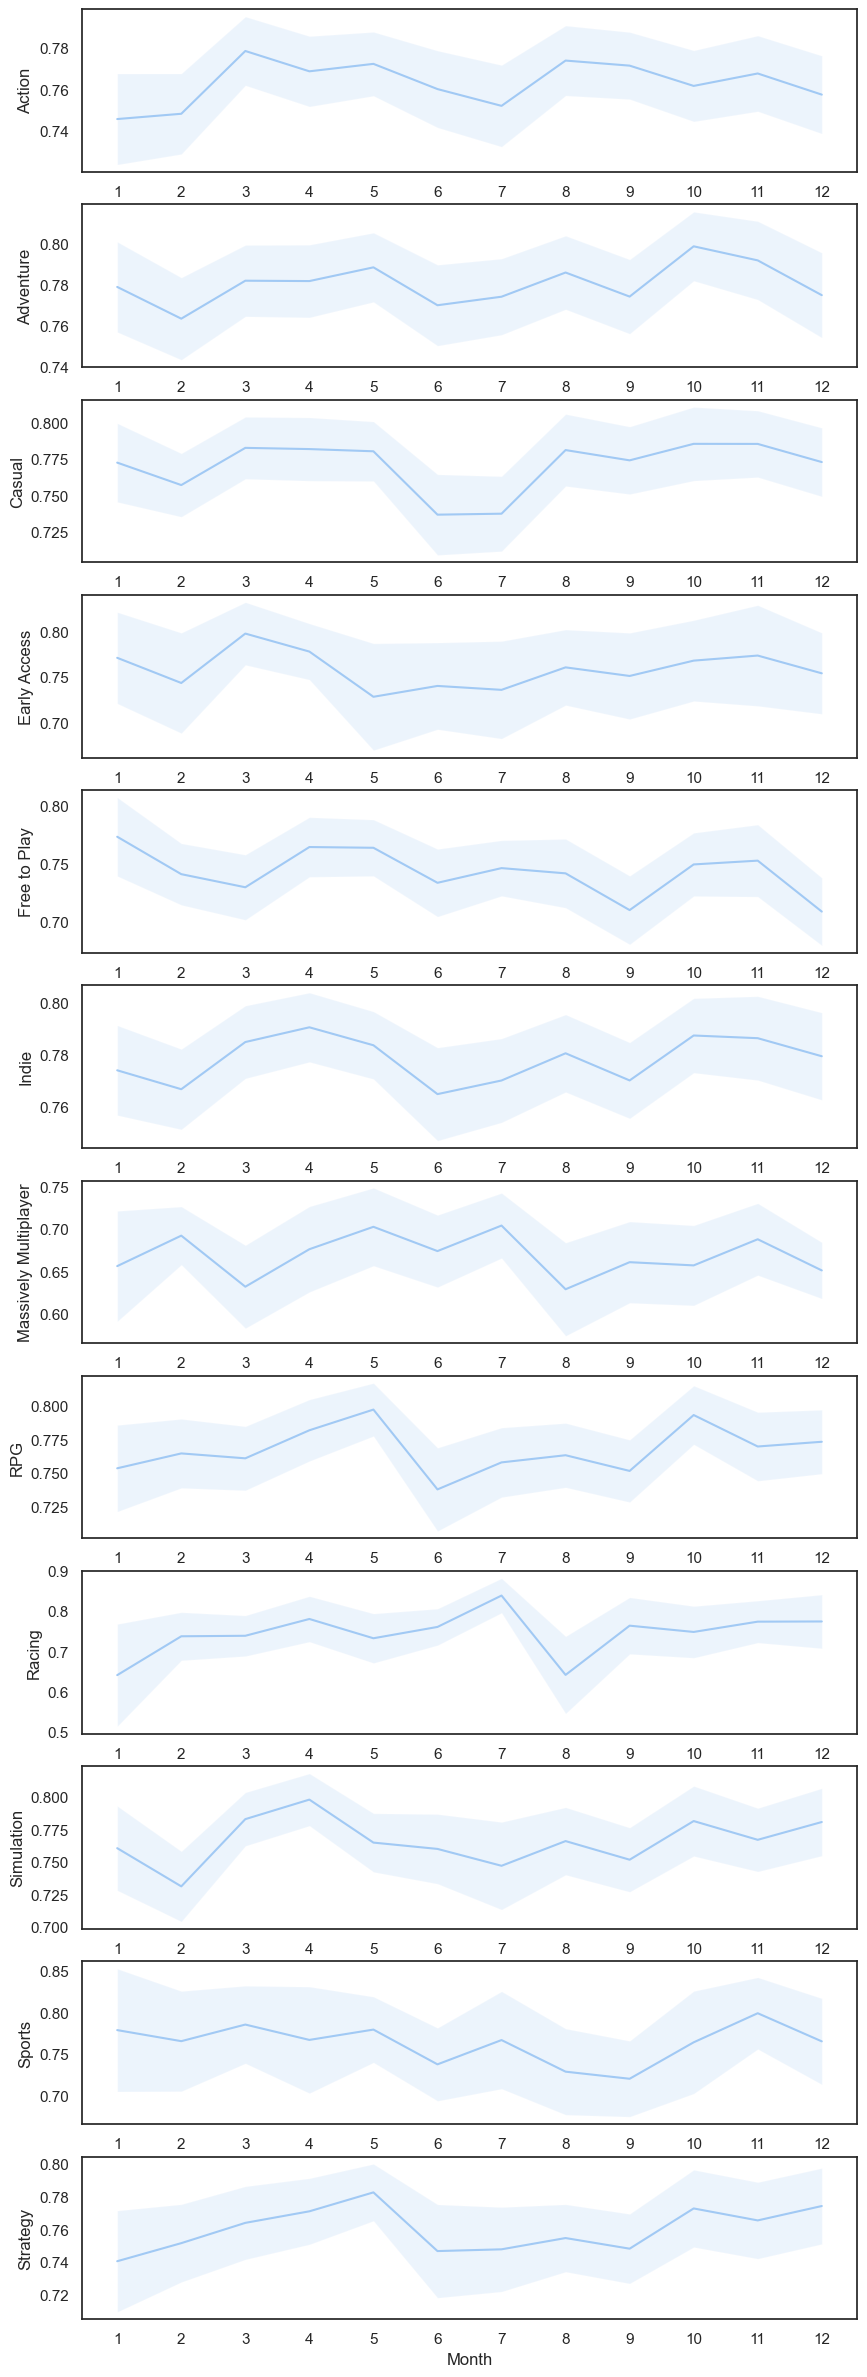

In [82]:
# Identify highly purchased games, over 100,000
genretime_df = genretime_df[genretime_df["Ratio_Owners"] >= 100000]

# Loop over the genre columns, and return Proportion Positive, grouping by month:
mean_tp = pd.DataFrame()
std_tp = pd.DataFrame()
n_tp = pd.DataFrame()
CI95 = pd.DataFrame()

labels = ["Action","Adventure","Casual","Early Access","Free to Play","Gore","Indie","Massively Multiplayer","Nudity",
          "RPG","Racing","Sexual Content","Simulation","Sports","Strategy","Violent"]

for col in genretime_df.columns[4:20]:
    temp_df = genretime_df[genretime_df[col] == 1]
    mean_tp[col] = (temp_df.groupby("Month")["Proportion_Positive"].mean())
    std_tp[col] = (temp_df.groupby("Month")["Proportion_Positive"].std())
    n_tp[col] = (temp_df.groupby("Month")["Proportion_Positive"].count())

CI95 = 1.96*(std_tp/np.sqrt(n_tp))
    
fig, ax = plt.subplots(12,1,figsize=(10,30))
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Action",ax=ax[0])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Adventure",ax=ax[1])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Casual",ax=ax[2])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Early Access",ax=ax[3])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Free to Play",ax=ax[4])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Indie",ax=ax[5])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Massively Multiplayer",ax=ax[6])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="RPG",ax=ax[7])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Racing",ax=ax[8])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Simulation",ax=ax[9])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Sports",ax=ax[10])
sns.lineplot(data=mean_tp, x=mean_tp.index, y="Strategy",ax=ax[11])

ax[0].fill_between(mean_tp.index, mean_tp["Action"] - CI95["Action"], mean_tp["Action"] + CI95["Action"], alpha=0.2)
ax[1].fill_between(mean_tp.index, mean_tp["Adventure"] - CI95["Adventure"], mean_tp["Adventure"] + CI95["Adventure"], alpha=0.2)
ax[2].fill_between(mean_tp.index, mean_tp["Casual"] - CI95["Casual"], mean_tp["Casual"] + CI95["Casual"], alpha=0.2)
ax[3].fill_between(mean_tp.index, mean_tp["Early Access"] - CI95["Early Access"], mean_tp["Early Access"] + CI95["Early Access"], alpha=0.2)
ax[4].fill_between(mean_tp.index, mean_tp["Free to Play"] - CI95["Free to Play"], mean_tp["Free to Play"] + CI95["Free to Play"], alpha=0.2)
ax[5].fill_between(mean_tp.index, mean_tp["Indie"] - CI95["Indie"], mean_tp["Indie"] + CI95["Indie"], alpha=0.2)
ax[6].fill_between(mean_tp.index, mean_tp["Massively Multiplayer"] - CI95["Massively Multiplayer"], mean_tp["Massively Multiplayer"] + CI95["Massively Multiplayer"], alpha=0.2)
ax[7].fill_between(mean_tp.index, mean_tp["RPG"] - CI95["RPG"], mean_tp["RPG"] + CI95["RPG"], alpha=0.2)
ax[8].fill_between(mean_tp.index, mean_tp["Racing"] - CI95["Racing"], mean_tp["Racing"] + CI95["Racing"], alpha=0.2)
ax[9].fill_between(mean_tp.index, mean_tp["Simulation"] - CI95["Simulation"], mean_tp["Simulation"] + CI95["Simulation"], alpha=0.2)
ax[10].fill_between(mean_tp.index, mean_tp["Sports"] - CI95["Sports"], mean_tp["Sports"] + CI95["Sports"], alpha=0.2)
ax[11].fill_between(mean_tp.index, mean_tp["Strategy"] - CI95["Strategy"], mean_tp["Strategy"] + CI95["Strategy"], alpha=0.2)

ax[0].set(xticks=mean_tp.index)
ax[1].set(xticks=mean_tp.index)
ax[2].set(xticks=mean_tp.index)
ax[3].set(xticks=mean_tp.index)
ax[4].set(xticks=mean_tp.index)
ax[5].set(xticks=mean_tp.index)
ax[6].set(xticks=mean_tp.index)
ax[7].set(xticks=mean_tp.index)
ax[8].set(xticks=mean_tp.index)
ax[9].set(xticks=mean_tp.index)
ax[10].set(xticks=mean_tp.index)
ax[11].set(xticks=mean_tp.index)

plt.show()

# 5. Which factors correlate with our metrics of success?

So far, we've identified multiplayer games to be most popular, with PVP and Co-op elements.
Now let's see whether other variables are associated with the number of game owners.

Note: Initial investigations revealed that the Ordinal scale of owners was more accurate, likely because of the variability in the Ratio scale.

Variables:
- Number of Estimated Game Owners (Ordinal_scale)
- Proportion of Positive Reviws (Proportion_Positive)
- Price
- Number of Previous Games Made by the Developer/Publisher
- Multiplayer, PvP, and Co-op

Text(0.5, 1.0, 'Correlation Coef: 0.16916715453904305')

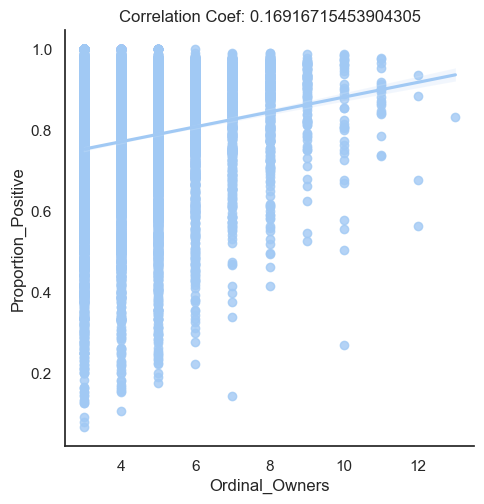

In [83]:
# First, lets determine the number of previous games made by the developer or publisher
a1_df['n_Dev'] = a1_df['Developers'].map(a1_df['Developers'].value_counts())
a1_df['n_Pub'] = a1_df['Publishers'].map(a1_df['Publishers'].value_counts())

# Filter the data to remove nans, filter by games that have decent sized audiences
no_zeros = a1_df[a1_df["Ratio_Owners"] >= 100000]
no_zeros = no_zeros[no_zeros["Proportion_Positive"] > 0]
no_zeros = no_zeros[no_zeros["n_Dev"] > 0]
no_zeros = no_zeros[no_zeros["n_Pub"] > 0]
no_zeros = no_zeros[no_zeros["Total_Reviews"] > 0]
no_zeros = no_zeros[no_zeros["Price"] >= 0]

no_zeros = no_zeros[["Price","Proportion_Positive","Total_Reviews","Ordinal_Owners","Ratio_Owners","n_Dev","n_Pub"]]

corr_coef = np.corrcoef(x = no_zeros["Ordinal_Owners"], y = no_zeros["Proportion_Positive"])
sns.lmplot(data=no_zeros, x="Ordinal_Owners", y="Proportion_Positive", fit_reg=True)
plt.title("Correlation Coef: {}".format(corr_coef[0,1]))

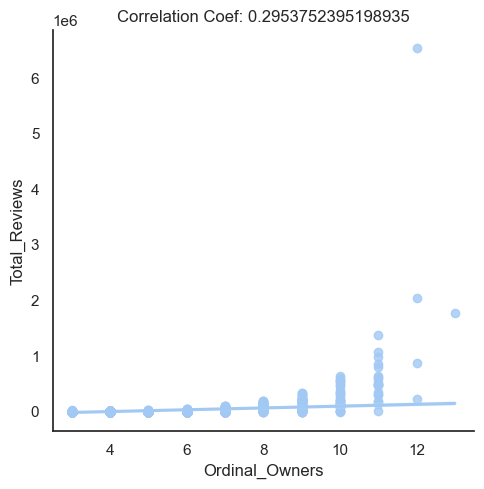

In [84]:
corr_coef = np.corrcoef(x = no_zeros["Ordinal_Owners"], y = no_zeros["Total_Reviews"])
sns.lmplot(data=no_zeros, x="Ordinal_Owners", y="Total_Reviews", fit_reg=True)
plt.title("Correlation Coef: {}".format(corr_coef[0,1]))
plt.show()

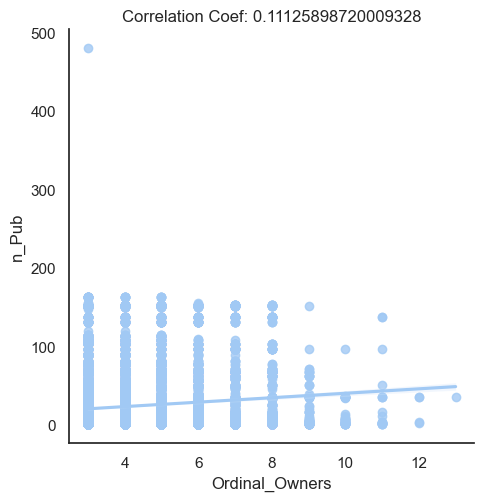

In [85]:
corr_coef = np.corrcoef(x = no_zeros["Ordinal_Owners"], y = no_zeros["n_Pub"])
sns.lmplot(data=no_zeros, x="Ordinal_Owners", y="n_Pub", fit_reg=True)
plt.title("Correlation Coef: {}".format(corr_coef[0,1]))
plt.show()

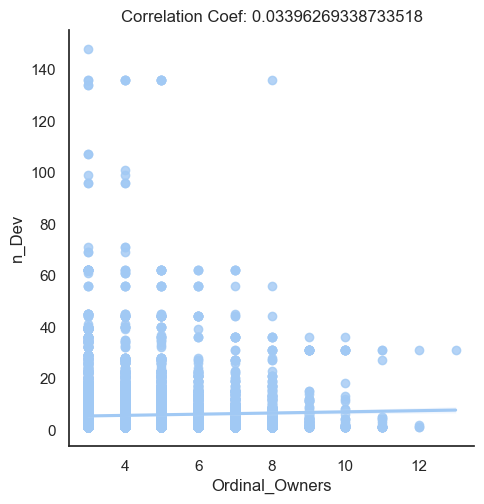

In [86]:
corr_coef = np.corrcoef(x = no_zeros["Ordinal_Owners"], y = no_zeros["n_Dev"])
sns.lmplot(data=no_zeros, x="Ordinal_Owners", y="n_Dev", fit_reg=True)
plt.title("Correlation Coef: {}".format(corr_coef[0,1]))
plt.show()

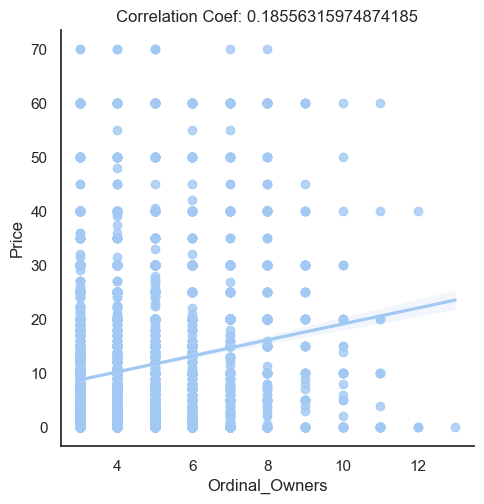

In [87]:
corr_coef = np.corrcoef(x = no_zeros["Ordinal_Owners"], y = no_zeros["Price"])
sns.lmplot(data=no_zeros, x="Ordinal_Owners", y="Price", fit_reg=True)
plt.title("Correlation Coef: {}".format(corr_coef[0,1]))
plt.show()

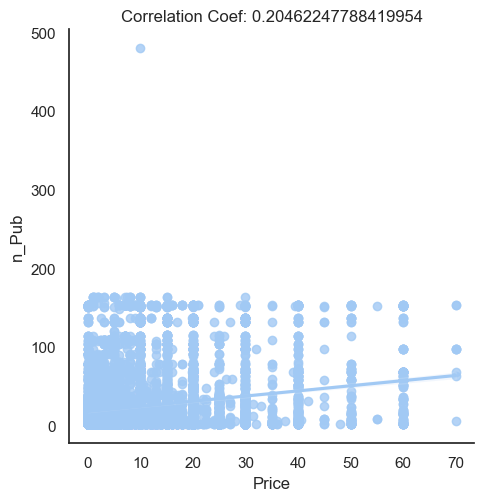

In [88]:
corr_coef = np.corrcoef(x = no_zeros["Price"], y = no_zeros["n_Pub"])
sns.lmplot(data=no_zeros, x="Price", y="n_Pub", fit_reg=True)
plt.title("Correlation Coef: {}".format(corr_coef[0,1]))
plt.show()

In [89]:
# Merge the datasets 
no_zeros = pd.merge(no_zeros,category_df)
no_zeros["Multiplayer"] = no_zeros['Multiplayer'].replace({'Single player': 0, 'Both': 1, 'Multiplayer': 1})
no_zeros["PvP"] = no_zeros['PvP'].replace({False: 0, True: 1})
no_zeros["Co-op"] = no_zeros['Co-op'].replace({False: 0, True: 1})
no_zeros

,Price,Proportion_Positive,Total_Reviews,Ordinal_Owners,Ratio_Owners,n_Dev,n_Pub,Name,Multiplayer,PvP,Co-op
0,0.00,0.639706,136,3,100000,1.0,1.0,Wartune Reborn,1,1,1
1,3.99,0.833333,270,3,100000,1.0,3.0,Deadlings: Rotten Edition,0,0,0
2,0.00,0.717073,205,3,100000,4.0,4.0,Cthulhu Realms,1,0,0
3,9.99,0.722567,483,5,500000,15.0,36.0,Alien Breed 3: Descent,1,0,1
4,7.99,0.944598,2166,4,200000,10.0,10.0,Hero of the Kingdom II,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13937,17.99,0.968421,95,3,100000,3.0,4.0,The Ninja Saviors: Return of the Warriors,1,0,1
13938,5.09,0.727273,154,3,100000,2.0,1.0,Arms Evolution: ZOMBIE DESTROYER,0,0,0
13939,0.79,0.928571,14,3,100000,3.0,3.0,Coonwood,1,1,1
13940,6.29,0.968408,1646,4,200000,2.0,2.0,Thronefall,0,0,0


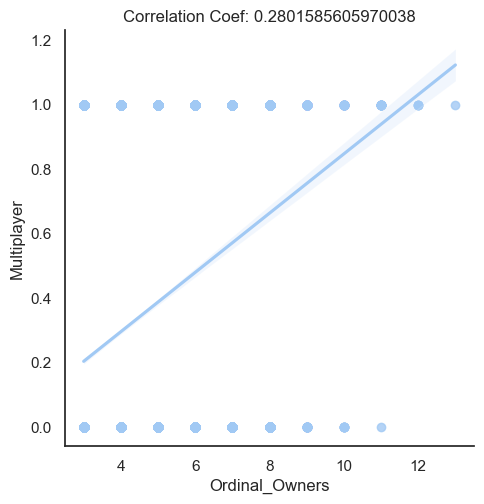

In [90]:
corr_coef = np.corrcoef(x = no_zeros["Ordinal_Owners"], y = no_zeros["Multiplayer"])
sns.lmplot(data=no_zeros, x="Ordinal_Owners", y="Multiplayer", fit_reg=True)
plt.title("Correlation Coef: {}".format(corr_coef[0,1]))
plt.show()

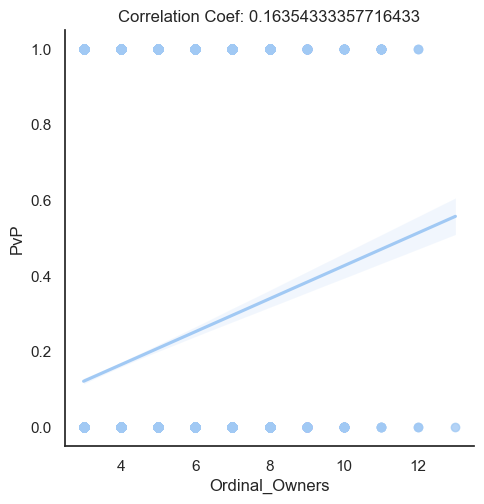

In [91]:
corr_coef = np.corrcoef(x = no_zeros["Ordinal_Owners"], y = no_zeros["PvP"])
sns.lmplot(data=no_zeros, x="Ordinal_Owners", y="PvP", fit_reg=True)
plt.title("Correlation Coef: {}".format(corr_coef[0,1]))
plt.show()

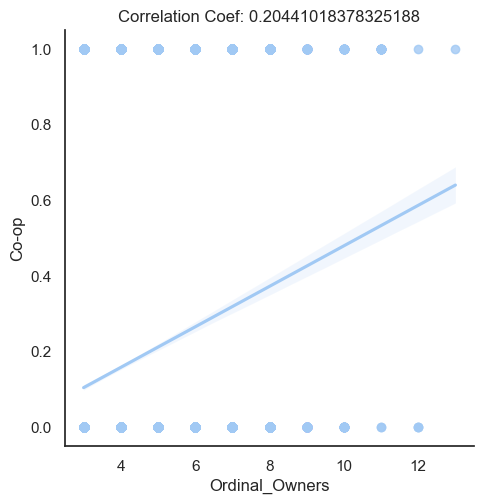

In [92]:
corr_coef = np.corrcoef(x = no_zeros["Ordinal_Owners"], y = no_zeros["Co-op"])
sns.lmplot(data=no_zeros, x="Ordinal_Owners", y="Co-op", fit_reg=True)
plt.title("Correlation Coef: {}".format(corr_coef[0,1]))
plt.show()

# 6. Build a predictive model

In [93]:
# Predict Ordinal Owners based on Proportion Positive Ratings, number of games made by Developer (n_Dev), 
# number of games made by publisher (n_Pub), Price, Multiplayer, PvP, and Co-op.
X = no_zeros[["Price","Proportion_Positive","n_Dev","n_Pub","Multiplayer","PvP","Co-op"]]
y = no_zeros["Ordinal_Owners"]

y.count()

# Note: we assume independence between our independent variables, but this is not completely the case
# The variance explained will likely be slightly over-estimated.

13942

## 6.1. Multiple regression (ordinary least squares)

Percentage variance explained by predictors = 0.11384504533971895


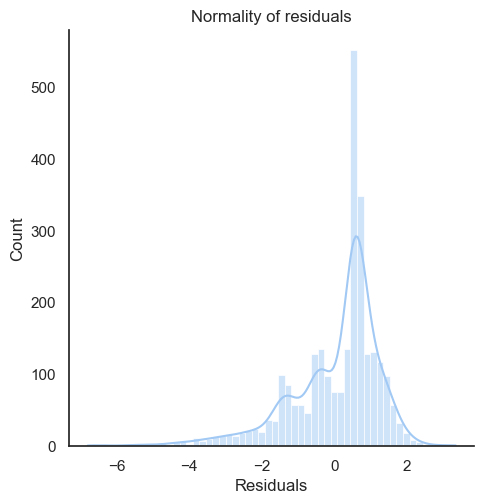

In [94]:
## The results are pretty good! 
# We can explain nearly 20% of the variance of successful games with 100,000+ purchases

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# split training and testing data: 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2,
                                                   random_state=1111)

dt = LinearRegression() # instantiate decision tree classifier
dt.fit(X_train,y_train) # fit on X_training and y_train set
y_pred = dt.predict(X_test) # predict on test labels
r2 = r2_score(y_test,y_pred) # variance explained
print("Percentage variance explained by predictors = {}".format(r2))

residuals = y_pred - y_test
sns.displot(residuals,kde=True)
plt.title("Normality of residuals")
plt.xlabel("Residuals")
plt.show()

[]

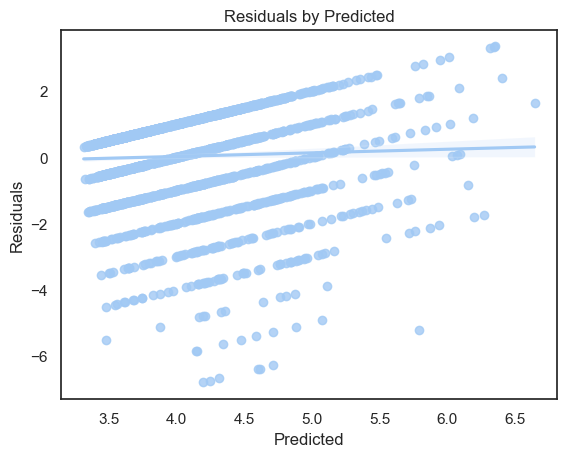

In [95]:
sns.regplot(x=y_pred,y=residuals)
plt.title("Residuals by Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.plot()

[]

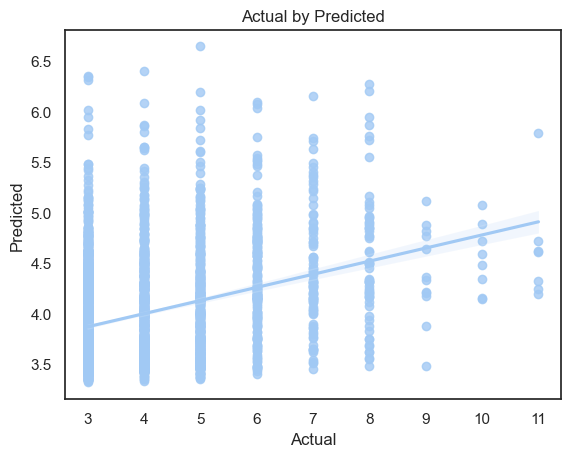

In [96]:
sns.regplot(x=y_test,y=y_pred)
plt.title("Actual by Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot()

## 6.2. Multiple regression using pingouin

In [97]:
from pingouin import linear_regression

est = linear_regression(X, y, relimp=True) 
est

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,3.279307,0.053913,60.825751,0.000000e+00,0.136848,0.136414,3.173630,3.384984,NaN,NaN
1,Price,0.026029,0.001075,24.212542,6.750236e-127,0.136848,0.136414,0.023922,0.028136,0.047368,34.613655
2,Proportion_Positive,0.200135,0.062295,3.212697,1.317938e-03,0.136848,0.136414,0.078028,0.322242,0.000521,0.380350
3,n_Dev,0.003468,0.001157,2.998951,2.713890e-03,0.136848,0.136414,0.001201,0.005735,0.002030,1.483433
4,n_Pub,0.003293,0.000320,10.282492,1.035686e-24,0.136848,0.136414,0.002666,0.003921,0.013415,9.803160
5,Multiplayer,0.817201,0.040192,20.332372,1.365010e-90,0.136848,0.136414,0.738419,0.895983,0.047125,34.435937
6,PvP,-0.124163,0.040673,-3.052748,2.271833e-03,0.136848,0.136414,-0.203887,-0.044439,0.010330,7.548667
7,Co-op,0.049006,0.040366,1.214034,2.247555e-01,0.136848,0.136414,-0.030117,0.128130,0.016059,11.734798


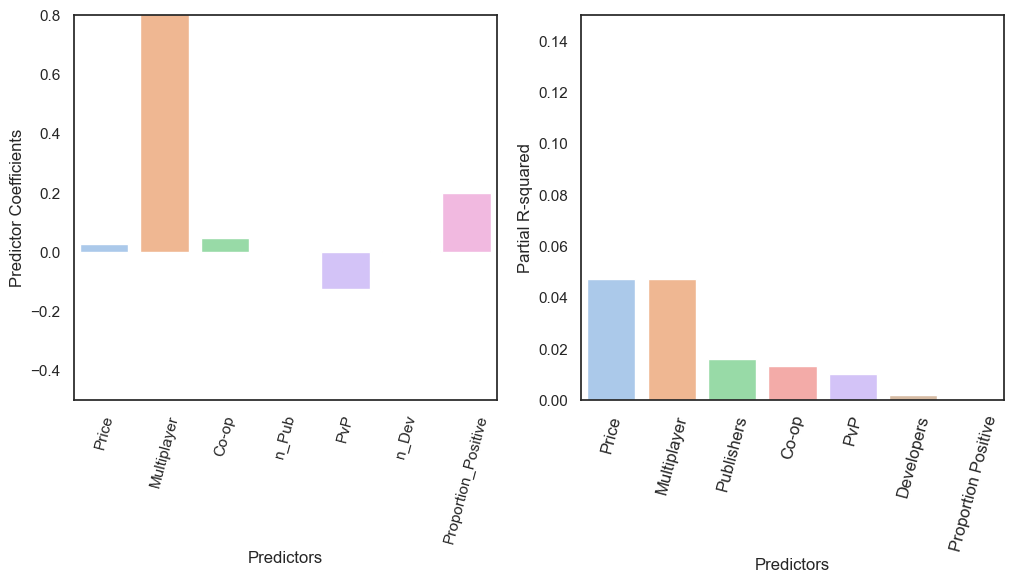

In [98]:
## Most of the variance is explained by price... More expensive games tend to have more players.
# remove constant
reg_coeff = est.tail(-1)
reg_coeff = reg_coeff.sort_values("relimp",ascending=False)

fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.barplot(x="names",y="coef",data=reg_coeff,ax=ax[0])
sns.barplot(x="names",y="relimp",data=reg_coeff,ax=ax[1])
ax[0].set_xticklabels(reg_coeff["names"], rotation=75)
ax[1].set_xticklabels(reg_coeff["names"], rotation=75)
ax[0].set_xlabel("Predictors")
ax[1].set_xlabel("Predictors")
ax[0].set_ylabel("Predictor Coefficients")
ax[1].set_ylabel("Partial R-squared")
ax[0].set_ylim((-0.5,0.8))
ax[1].set_ylim((0,0.15))

ax[1].set_xticklabels(["Price","Multiplayer","Publishers","Co-op","PvP","Developers","Proportion Positive"], fontsize=12)
plt.show()

## 6.3. Poisson Regression, which might better account for the Ordinal Owners DV

In [99]:
# The r-squared is lower than the standard multiple regression...
import statsmodels.api as sm

poisson = sm.add_constant(X)
poission_model = sm.GLM(y, poisson, family=sm.families.Poisson())
result = poission_model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         Ordinal_Owners   No. Observations:                13942
Model:                            GLM   Df Residuals:                    13934
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24974.
Date:                Tue, 15 Aug 2023   Deviance:                       5050.9
Time:                        19:05:11   Pearson chi2:                 5.60e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06123
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2065      0.021     56.934      0.000       1.165       1.248
Price                   0.0058      0.000     15.201      0.000       0.005       0.007
Proportion_Positive     0.0526      0.024      2.153      0.031       0.005       0.100
n_Dev                   0.0008      0.000      1.862      0.063   -4.22e-05       0.002
n_Pub                   0.0008      0.000      6.593      0.000       0.001       0.001
Multiplayer             0.1955      0.015     13.332      0.000       0.167       0.224
PvP                    -0.0269      0.015     -1.834      0.067      -0.056       0.002
Co-op                   0.0094      0.015      0.647      0.518      -0.019       0.038
=======================================================================================
"""

## 6.4. Random Forest Regression

RMSE: 1.1680909984699277
R squared: 0.28830860692569027


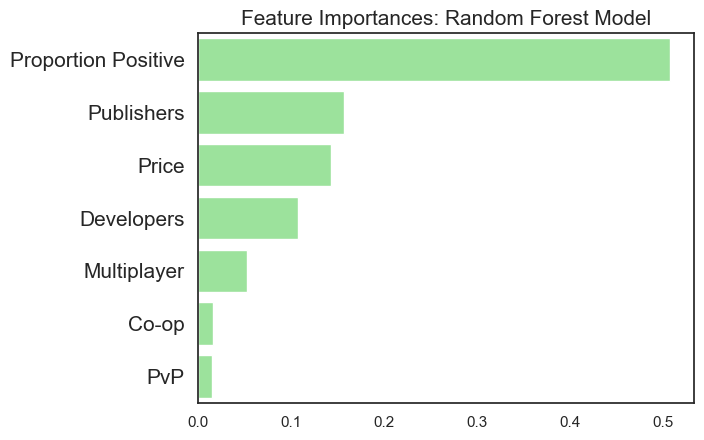

In [100]:
# Note: the random forest model nonlinearly relates each variable to predictor. Can output very different results
# There is a nonlinear relationship between proportion positive reviews and number of game owners
# Random forest models also tend to overestimate continuous predictors

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test) # get predicted labels
mse_dt = MSE(y_test,y_pred) # compute mean square error
rmse_dt = mse_dt**(1/2) # obtain root mean square error
r2 = r2_score(y_test,y_pred)
print("RMSE:", rmse_dt)
print("R squared:", r2)

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values(ascending=False)

# Draw a horizontal barplot of importances_sorted
ax = sns.barplot(x=importances_sorted.values,y=importances_sorted.index,color='lightgreen')
ax.set_yticklabels(["Proportion Positive","Publishers","Price","Developers","Multiplayer","Co-op","PvP"],fontsize=15) 
plt.title("Feature Importances: Random Forest Model",fontsize=15)
plt.show()

# 7. Steam Game Recommender

Used the count vectorized tags and then provide cosine similarity between titles.

In [101]:
from sklearn.metrics.pairwise import cosine_similarity

new_df = pd.concat([a1_df[["Name","Proportion_Positive","Total_Reviews"]], tags_df], axis=1)
new_df = new_df[new_df["Total_Reviews"] >= 50]

# include only indices of cleaned tags
corr_values = cosine_similarity(new_df.iloc[:,3:451])
corr_values = pd.DataFrame(corr_values)

# reset indices for renaming
new_df_clean = new_df.reset_index()

# Rename index
corr_values.index = new_df['Name']
corr_values = corr_values.rename(columns=new_df_clean['Name'])

In [102]:
# create a dataframe with important info, sorted based on cosine similarity
# This recommends games based on user-defined "tags" which may or may not be accurate.
# In a future version, include game description and reviews.

# Higher cosine similarity values > 0.6~0.7 tend to be a good match.

def game_recommender(name, pos_value, rev_value, nlarg):
    """
    Arguments:
    1. name: The title of the game in steam. Must match exactly.
    2. pos_value: Filter by proportion positive reviews
    3. rev_value: Filter by number of reviews
    4. nlarg: Return n titles
    """
    global corr_values, a1_df
    
    # load and rename column
    games = pd.DataFrame(corr_values.loc[name,:])
    games.columns.values[0] = "Similarity"
    
    # append dfs based on game names
    orig_df = a1_df[a1_df["Name"].isin(games.index)]
    games_df = orig_df[["Name","Price","Proportion_Positive","Total_Reviews"]]
    games_df = games_df.rename(columns={"Price": "Price $USD" })

    # drop the same game used for the recommender
    games_df = games_df.drop(games_df.index[(games_df["Name"] == name)])
    games_df = games_df.set_index("Name")
    games_df.index.name = None
    games_df = games_df.join(games)
    
    # filter based on parameters
    games_df = games_df[games_df["Proportion_Positive"] >= pos_value]
    games_df = games_df[games_df["Total_Reviews"] >= rev_value]
    
    # sort similarity
    games_df = games_df.nlargest(nlarg+1,"Similarity")
    games_df = games_df.sort_values("Similarity",ascending=False)
        
    return games_df

In [103]:
# Need to provide exact string for this to work, change later to fuzzy mapping.
# It works!
game_recommender("NieR:Automata™", 0.85, 50, 10)

,Price $USD,Proportion_Positive,Total_Reviews,Similarity
NieR Replicant™ ver.1.22474487139...,59.99,0.880894,18429,0.750000
.hack//G.U. Last Recode,7.49,0.874956,2855,0.614919
Ys: Memories of Celceta,24.99,0.936772,601,0.606780
Horizon Zero Dawn™ Complete Edition,49.99,0.861877,78401,0.600000
Devil May Cry 4 Special Edition,24.99,0.904304,11547,0.600000
ENSLAVED™: Odyssey to the West™ Premium Edition,19.99,0.852604,6201,0.600000
Kandria,17.99,0.982143,56,0.600000
Tales of Berseria™,7.49,0.922976,15190,0.600000
Terminator: Resistance,39.99,0.929061,9487,0.600000
Ys VIII: Lacrimosa of DANA,59.99,0.870577,4126,0.596559


In [104]:
game_recommender("Slay the Spire", 0.85, 50, 10)

,Price $USD,Proportion_Positive,Total_Reviews,Similarity
Blood Card 2: Dark Mist,5.99,0.863208,212,0.900000
Dicey Dungeons,14.99,0.902158,8340,0.850000
Iris and the Giant,17.99,0.888778,998,0.800000
Roguebook,24.99,0.850710,2465,0.800000
Across the Obelisk,19.99,0.941207,1956,0.750000
Card Quest,9.99,0.881295,278,0.750000
Poker Quest,14.99,0.926554,354,0.750000
Legend Creatures(传奇生物),4.99,0.909014,3539,0.726722
Erannorth Reborn,19.99,0.863372,344,0.700000
Gordian Quest,19.99,0.918421,4180,0.700000


In [105]:
game_recommender("Loop Hero", 0.85, 50, 10)

,Price $USD,Proportion_Positive,Total_Reviews,Similarity
Black Book,24.99,0.941477,3725,0.550000
Gordian Quest,19.99,0.918421,4180,0.550000
Lost In Fantaland,11.89,0.907216,97,0.550000
Tinyfolks,3.99,0.956332,458,0.550000
Increlution,2.99,0.885906,596,0.527046
Age of Fear: The Undead King,4.99,0.891117,349,0.500000
Knock on the Coffin Lid,24.99,0.863158,475,0.500000
Necrosmith,2.99,0.857054,1616,0.500000
UnderMine,19.99,0.930890,7394,0.500000
Alina of the Arena,12.99,0.916183,1551,0.474342


In [106]:
game_recommender("The Forest", 0.85, 50, 10)

,Price $USD,Proportion_Positive,Total_Reviews,Similarity
The Long Dark,34.99,0.914913,90284,0.80
Green Hell,24.99,0.870716,47856,0.75
Subnautica,29.99,0.963634,199033,0.75
Project Zomboid,19.99,0.923807,109328,0.70
The Infected,13.99,0.879056,4407,0.70
Volcanoids,19.99,0.858340,4772,0.70
Medieval Dynasty,34.99,0.906533,26373,0.65
Raft,19.99,0.932132,196130,0.65
Satisfactory,29.99,0.971783,100683,0.65
Darkwood,14.99,0.946186,13175,0.65


In [107]:
game_recommender("Stardew Valley", 0.85, 50, 10)

,Price $USD,Proportion_Positive,Total_Reviews,Similarity
Coral Island,24.99,0.891509,1484,0.750000
Littlewood,14.99,0.944131,5495,0.750000
Forager,19.99,0.909460,31003,0.700000
STORY OF SEASONS: Friends of Mineral Town,39.99,0.946282,4021,0.650791
Fantasy Farming: Orange Season,16.99,0.896797,281,0.650000
My Time At Portia,7.49,0.927180,37778,0.650000
My Time at Sandrock,24.99,0.867881,8288,0.650000
Roots of Pacha,22.49,0.930272,588,0.650000
DORAEMON STORY OF SEASONS: Friends of the Great Kingdom,49.99,0.932203,59,0.600000
Garden Paws,19.99,0.917064,2098,0.600000


In [108]:
game_recommender("Tales of Berseria™", 0.85, 50, 10)

,Price $USD,Proportion_Positive,Total_Reviews,Similarity
Cyberdimension Neptunia: 4 Goddesses Online,29.99,0.873834,4502,0.800000
Fate/EXTELLA,39.99,0.917874,3933,0.769484
Ys VIII: Lacrimosa of DANA,59.99,0.870577,4126,0.759257
Atelier Ryza: Ever Darkness & the Secret Hideout,59.99,0.869652,6030,0.750000
Ys: Memories of Celceta,24.99,0.936772,601,0.741620
Atelier Ryza 2: Lost Legends & the Secret Fairy,59.99,0.920807,2033,0.737865
.hack//G.U. Last Recode,7.49,0.874956,2855,0.726722
Fate/EXTELLA LINK,49.99,0.931530,3622,0.726722
Trials of Mana,49.99,0.926228,4541,0.726722
Tokyo Xanadu eX+,59.99,0.867107,1362,0.707107
